In [1]:
import sys
import os
import copy
from glob import glob
from collections import OrderedDict

import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.time import Time
import astropy.units as u
import astropy.constants as aconst
from astropy import stats
from astropy.io.ascii import latex
from astropy.coordinates import SkyCoord

# Setting and imports to enable the display of plots and images in the notebook itself
%matplotlib inline
import IPython

In [2]:
os.environ['XUVTOP'] = '/melkor/d1/guenther/downdata/CHIANTI/'

import chianti.core as ch

 using cli
 using CLI for selections


In [3]:
datadir = '/melkor/d1/guenther/downdata/Chandra/RWaur/'
datadirXMM = '/melkor/d1/guenther/downdata/XMM/RWAur/'
figout = '/melkor/d1/guenther/Dropbox/my_articles/RWAur/'

In [4]:
obsids = [14539, 17644, 17764, 19980]

\begin{abstract}
Young stars are variable objects on a wide range of time scales, as rotation, magnetic fields, outflows and their circumstellar disk interact. RW~Aur~A has undergone a visual dimming event in 2011 ($\delta V \sim 2$~mag) lasting about half a year and further dimming 2014-2016 ($\Delta V$ up to 3~mag). Visual and IR observations indicate that the cause for this dimming is a gray absorber that moved into the line-of-sight. This dimming is also associated with changes in the outflow. We report on new \emph{Chandra} X-ray data taken in 2017, when the optical flux was almost 2~mag below the long-term average. The observed X-ray spectrum is more absorbed by a column density of a few $10^{23}\;\mathrm{cm}^{-2}$ and shows significantly more hot plasma than in X-ray observations taken before the dimming. 
An emission feature at 6.62~keV is present indicating an Fe abundance an order of magnitude above Solar, in contrast with previous sub-Solar Fe abundance measurements.
Comparing X-ray absorbing column density $N_\mathrm{H}$ and optical reddening $A_V$, we find that either the gas-to-dust ratio in the absorber is orders of magnitude higher than in the ISM or the absorber has undergone significant dust evolution. Given the high column density coupled with changes in the X-ray spectral shape, this absorber is probably located in the inner disk. We speculate that a break-up of planetesimals or a terrestrial planet could supply large grains causing gray absorption; some of these grains would be accreted and enrich the stellar corona with iron which could explain the inferred high abundance.

\end{abstract}

%% Keywords should appear after the \end{abstract} command. 
%% See the online documentation for the full list of available subject
%% keywords and the rules for their use.
\keywords{protoplanetary disks --- stars: individual (RW Aur) --- circumstellar matter --- stars: variables: T Tauri, Herbig Ae/Be --- stars: pre-main sequence}


## Introduction


The formation of stars and planetary systems from large-scale molecular clouds is a complicated process with many interacting components. After the initial collapse of the cloud, an accretion disk forms around the central proto-star.  Low mass stars ($<3\;M_{\odot}$) at this stage are called classical T Tauri stars (CTTS).
Their circumstellar disks are the sites of planet formation. Disks regulate the angular momentum of the star, and they may launch a disk wind. Typical disks contain a mass of $10^{-3}$ to $10^{-1}\,M_\odot$
and disperse within a few Myrs \citep[see review by][]{2014prpl.conf..475A}, which also sets the 
time-scale for planet formation. During their evolution disks undergo large structural changes. In particular, grains grow to larger sizes and settle in the disk mid-plane leaving
a gas rich disk atmosphere behind \citep[see review by][]{2011ARA&A..49...67W}.

Gas comprises the majority of the mass in a protoplanetary disk and thus 
controls essential transport processes within the disk such as
angular momentum redistribution and dust grain motion.
For example, gas affects grain growth through the coupling of
gas and dust dynamics \citep{1977MNRAS.180...57W,2001ApJ...557..990T}
as well as the thermal and chemical balance of the disk 
\citep[e.g.][]{2009A&A...501..383W}. 
Images of T~Tauri star disks often have asymmetries or gaps \citep{2015ApJ...808L...3A,2015MNRAS.453.1768P,2016ApJ...820L..40A}. Thus, the distribution of grain sizes in the stellar environment differs significantly for different sight lines.

Stellar UV and X-ray emission ionize the upper layers of the disk and in particular the inner disk edge. These ions couple more effectively to the star-disk magnetic field. On the disk surface, ions can be accelerated magneto-centrifugally into a disk wind, possibly dredging along dust particles from the disk. Outflows can be clumpy, presumably changing in response to the magnetic field or the stellar irradiation \citep{2012ApJ...758..100B,2014A&A...563A..87E}. The winds remove angular momentum and allow accretion to proceed. From the inner disk edge, gas is funneled onto the star. 
% \citet{1994ApJ...429..781S} predict that this region can also be the source of an outflow, the so-called X-wind. 

In [5]:
1.4*140

196.0

Recent space-based monitoring campaigns with \emph{COROT}, \emph{K2}, and \emph{Spitzer} revealed many different types of variability in the lightcurves of CTTS on time scales as short as hours. Of particular interest are stars with periodic or quasi periodic dips in their lightcurve \citep{2014AJ....148..122G,2015AJ....149..130S}. A well known star of this type is \object{AA Tau} which shows a recurring dip in the lightcurve with a periodicity of eight days; this dip is caused by increased reddening in the visual \citep{1999A&A...349..619B} and is associated with an increase in absorbing column density in X-rays \citep{2007A&A...462L..41S}; the ratio of absorbing column density $N_\mathrm{H}$ and  visual extinction $A_V$ is higher than in the ISM, indicating gas-rich material. The inner disk of AA~Tau is seen very close to edge-on and the best explanation is that an asymmetric feature, such as a warp caused by a planet embedded in the disk, moves through our line-of-sight periodically. In addition, AA~Tau has shown a multi-year long dimming event where the visual extinction increased by 4 magnitudes \citep{2013A&A...557A..77B} along with an increased X-ray absorbing column density \citep{2015A&A...584A..51S}. The duration of the event and the variable line emission originating from the upper layers of the disk indicate a position in the disk at a radius of few AU. This absorber has an ISM-like $N_\mathrm{H}/A_V$ ratio.

In this paper we report on new observations of \object{RW Aur} which is a binary system composed of two K-type stars with masses of 1.4 and 0.9~$M_\sun$ and an age close to 10~Myr \citep{1997ApJ...490..353G, 2001A&A...376..982W}. The binary components are separated by 1.4\arcsec{} \citep[semi-major axis 200~au, period 1000~years;][]{2017arXiv170208583C} and are located at a distance of 140~pc \citep{2007A&A...474..653V}. In this paper we concentrate on the primary star which is one of only a few sources with an X-ray detected jet \citep{2014ApJ...788..101S}, indicating outflows in excess of 400~km~s$^{-1}$. The disk mass around RW~Aur~A is $\sim0.001\;M_\sun$ \citep{2005ApJ...631.1134A} and the disk has an intermediate inclination with estimates varying between $45-60^\circ$ \citep{2006A&A...452..897C} and $77^\circ$ \citep{2013ApJ...766...12M}, possibly because the inner disk is warped \citep{2016MNRAS.463.4459B}.

Like AA~Tau, RW~Aur~A has shown multiple optical dimming events. One event occured in 2011 and lasted about half a year \citep{2013AJ....146..112R} with dimming of $\Delta m_V=2$~mag. Another dimming event started in mid-2014 with dimming of $\Delta m_V=3$~mag compared to its typical bright state around $m_v=11$~mag, which has been stable for decades \citep{2013AJ....146..112R}. The stellar flux reached the bright state again in November and December of 2016 before plunging into a new dimming phase. \citet{2016ApJ...820..139T} find that veiling, a measure of how strongly the continuum from the accretion shock contributes to the optical flux, is stronger in the 2015/16 dimming of RW~Aur than in the bright state; X-shooter data \citep{2016A&A...596A..38F} confirm this finding. On the other hand, \citet{2015A&A...577A..73P} infer no changes in the accretion close to the star, but see increased wind signatures. At the same time, photometry indicates that the 2015 extinction in RW Aur A is gray up to at least $K$ band  \citep{2015A&A...584L...9S,2015IBVS.6126....1A}, while a selective (reddening) $A_V = 0.44$~mag is seen in the bright state \citet{2015IBVS.6126....1A}.


\citet{2006A&A...452..897C} observed a stream of gas on the outer edge of the disk of RW~Aur~A. Modeling by \citet{2015MNRAS.449.1996D} showed that tidal interaction in the passage of its binary companion, RW~Aur~B, can cause such a stream to form and \citet{2013AJ....146..112R} suggested this scenario to explain the first dimming event in 2011.
However, in the new 2016 dimming event, multiple signatures indicate variability arising from material close to the star (i.e., in contrast to signatures of a tidal stream located at the edge of the disk). \citet{2015IBVS.6143....1S} report that both increased hot dust emission and optical spectroscopic signatures indicated that there was an increase in absorption by an outflow during the dim state in 2015 \citep{2015A&A...577A..73P,2016A&A...596A..38F,2016MNRAS.463.4459B}.
Coupled with the fact that mass accretion is more stable during this dim state \citep{2016ApJ...820..139T}, it appears that the recent dimming events can only be explained by phenomena close to the star.

RW~Aur~AB has been observed in X-ray several times, but \emph{Chandra} data is required to resolve the components. The first \emph{Chandra} observation was taken in 2013 \citep{2014ApJ...788..101S} when RW~Aur~A was in a bright state. \citet{2015A&A...584L...9S} obtained a second dataset in 2015, catching RW~Aur in a fainter state. Here, we report on a third dataset observed in 2017 during the most recent dimming event.

We first describe observations and data reduction in section~\ref{sect:obs} before we derive results in section~\ref{sect:results}. We discuss the results in section~\ref{sect:discussion} and go through several physical scenarios that might cause the observed signatures in section~\ref{sect:scenarios}. We end with a short summary in section~\ref{sect:summary}.

In [6]:
from astropy import table

def read_lcs(obsid, source):
    lcall = Table.read(os.path.join(datadir, '{0}_{1}_lc.fits').format(obsid, source), hdu=1)
    lcsoft = Table.read(os.path.join(datadir, '{0}_{1}_lc_soft.fits').format(obsid, source), hdu=1)
    lchard = Table.read(os.path.join(datadir, '{0}_{1}_lc_hard.fits').format(obsid, source), hdu=1)
    lc = table.hstack([lcall, lcsoft, lchard], table_names=['all', 'soft', 'hard'], metadata_conflicts='silent')
    # time columns are the same for each lightcurve, so remove dublicate entries here for simplicity
    for c in lc.colnames:
        if (('TIME' in c) or ('AREA' in c) or ('EXPOSURE' in c)) and ('all' in c):
            lc.rename_column(c, c[:-4])
            lc.remove_columns([c[:-4] + '_soft', c[:-4] + '_hard'])
    ind  = lc['EXPOSURE'] > 0.
    return lc[ind]
    
lccurves = [[ read_lcs(obsid, t) for t in ['srca', 'srcb']] for obsid in obsids]
for list1 in lccurves:
    for lc in list1:
        lc['t'] = lc['TIME'] - lc['TIME'][0]

In [7]:
lccurves[0][0]

TIME_BIN,TIME_MIN,TIME,TIME_MAX,COUNTS_all,STAT_ERR_all,AREA,EXPOSURE,COUNT_RATE_all,COUNT_RATE_ERR_all,BG_COUNTS_all,BG_ERR_all,BG_AREA,BG_EXPOSURE,BG_RATE_all,NORM_BG_COUNTS_all,NORM_BG_ERR_all,NET_COUNTS_all,NET_ERR_all,NET_RATE_all,ERR_RATE_all,COUNTS_soft,STAT_ERR_soft,COUNT_RATE_soft,COUNT_RATE_ERR_soft,BG_COUNTS_soft,BG_ERR_soft,BG_RATE_soft,NORM_BG_COUNTS_soft,NORM_BG_ERR_soft,NET_COUNTS_soft,NET_ERR_soft,NET_RATE_soft,ERR_RATE_soft,COUNTS_hard,STAT_ERR_hard,COUNT_RATE_hard,COUNT_RATE_ERR_hard,BG_COUNTS_hard,BG_ERR_hard,BG_RATE_hard,NORM_BG_COUNTS_hard,NORM_BG_ERR_hard,NET_COUNTS_hard,NET_ERR_hard,NET_RATE_hard,ERR_RATE_hard,t
channel,s,s,s,ct,ct,pix2,s,ct / s,ct / s,ct,ct,pix2,s,ct / s,ct,ct,ct,ct,ct / s,ct / s,ct,ct,ct / s,ct / s,ct,ct,ct / s,ct,ct,ct,ct,ct / s,ct / s,ct,ct,ct / s,ct / s,ct,ct,ct / s,ct,ct,ct,ct,ct / s,ct / s,s
int32,float64,float64,float64,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,474340400.855,474342200.855,474344000.855,46,6.78232998313,3.78448847324,2799.74608251,0.0164300613857,0.00242248039045,7.0,2.64575131106,25.9567100265,2799.74608251,0.0025002267326,1.02060004082,0.385750556583,44.9793999592,6.79329106486,0.0160655283135,0.00242639541753,27,5.19615242271,0.0096437316829,0.00185593702771,1.0,1.0,0.000357175247515,0.145800005832,0.145800005832,26.8541999942,5.19819753777,0.00959165552973,0.00185666749219,19,4.35889894354,0.00678632970278,0.00155689080905,6.0,2.44948974278,0.00214305148509,0.874800034992,0.357135618783,18.125199965,4.37350498459,0.00647387278376,0.00156210772538,0.0
2,474344000.855,474345800.855,474347600.855,51,7.14142842854,3.78448847324,3265.00997642,0.0156201666667,0.00218726082925,8.0,2.82842712475,25.9567100265,3265.00997642,0.00245022222222,1.16640004666,0.412384691283,49.8335999533,7.15332518019,0.0152629242524,0.00219090453991,32,5.65685424949,0.00980088888889,0.00173256874875,4.0,2.0,0.00122511111111,0.583200023328,0.291600011664,31.4167999767,5.66436497472,0.00962226768174,0.00173486911698,19,4.35889894354,0.00581927777778,0.00133503388199,4.0,2.0,0.00122511111111,0.583200023328,0.291600011664,18.4167999767,4.3686417302,0.00564065657063,0.00133801788103,3600.0
3,474347600.855,474349400.855,474351200.855,41,6.40312423743,3.78448847324,3265.00997642,0.0125573888889,0.00196113466228,7.0,2.64575131106,25.9567100265,3265.00997642,0.00214394444444,1.02060004082,0.385750556583,39.9793999592,6.41473331417,0.0122448017764,0.0019646902645,23,4.79583152331,0.00704438888889,0.00146885662156,2.0,1.41421356237,0.000612555555556,0.291600011664,0.206192345642,22.7083999883,4.80026200154,0.00695507828532,0.00147021357858,18,4.24264068712,0.005513,0.00129942656156,5.0,2.2360679775,0.00153138888889,0.72900002916,0.32601872416,17.2709999708,4.25514843554,0.00528972349107,0.00130325740695,7200.0
4,474351200.855,474353000.855,474354800.855,44,6.63324958071,3.78448847324,3265.00997642,0.0134762222222,0.00203161694103,9.0,3.0,25.9567100265,3265.00997642,0.0027565,1.31220005249,0.437400017496,42.6877999475,6.6476551336,0.0130743245061,0.00203602904175,19,4.35889894354,0.00581927777778,0.00133503388199,6.0,2.44948974278,0.00183766666667,0.874800034992,0.357135618783,18.125199965,4.37350498459,0.00555134596706,0.00133950738778,25,5.0,0.00765694444444,0.00153138888889,3.0,1.73205080757,0.000918833333333,0.437400017496,0.252533017845,24.5625999825,5.0063732307,0.00752297853909,0.00153334086783,10800.0
5,474354800.855,474356600.855,474358400.855,60,7.74596669241,3.78448847324,3265.00997642,0.0183766666667,0.00237241746529,6.0,2.44948974278,25.9567100265,3265.00997642,0.00183766666667,0.874800034992,0.357135618783,59.125199965,7.75419537091,0.0181087348559,0.00237493772666,25,5.0,0.0076569444444

## Observations and data reduction

\label{sect:obs}

We present new and archival X-ray data from \emph{Chandra} and archival data from \emph{XMM-Newton} as well as optical
data from \emph{Chandra}'s aspect camera (ACA) and AAVSO long-term monitoring lightcurves extended into 2017.

### \emph{XMM-Newton} X-ray data
\emph{XMM-Newton} observed RW~Aur AB on 2007-02-01 for 36~ks (ObsID: 0401870301). The EPIC PN and both MOS cameras were operated in full frame mode with the medium filter. RW~Aur~AB was centered in the field of view, but the count rate in the RGS is too low to analyze the grating spectrum. We reduced the data with SAS version 15.0.0 following the standard procedures to screen periods of high-background flux. We extracted a source region centered on the unresolved binary (AB) with a radius of 30\arcsec{} in the PN and MOS detectors. We selected source-free background regions on the same chip (avoiding the chip edges where noise can be higher) with a radius of 50\arcsec{} in the PN and 105\arcsec{} for the MOS detectors.

### \emph{Chandra} X-ray data

Details of the four existing \emph{Chandra} observations are listed in table~\ref{tab:obslog}. Observations were taken roughly two years apart, where the last observation is split into two orbits separated by two days. All processing is done with CIAO version 4.9 and CALDB 4.7.1. RW~Aur~B, the brighter member of the binary in X-rays, was bright enough to cause pile-up in $\sim10%\% of the photons in the 2017 observations; previous data were taken in a 1/8 sub-array mode that reduces the field-of-view and the frame time to alleviate this problem. For RW~Aur~A, the focus of this paper, pile-up is not significant in any of the observations.

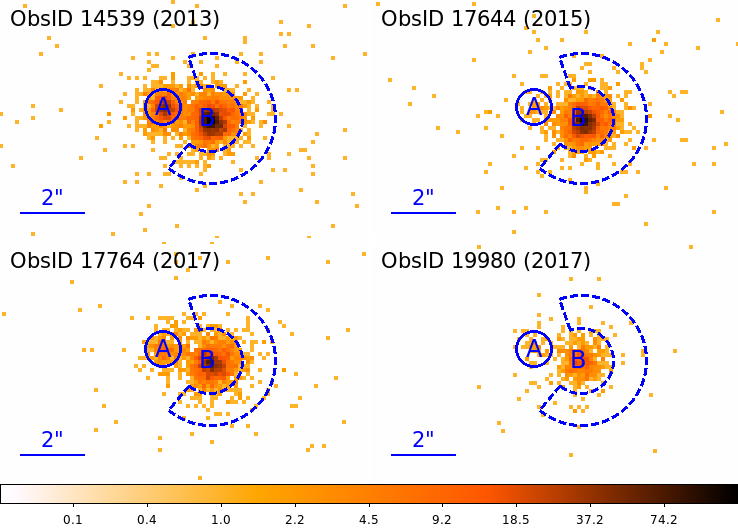

In [8]:
IPython.display.Image(filename=os.path.join(figout, 'regions.png'))

In [9]:
# How many counts does the background contribute
areafrac = lccurves[1][1]['AREA'][0]/lccurves[1][1]['BG_AREA'][0]
for o in obsids:
   bbkg = len(Table.read(os.path.join(datadir, '{}_bkgb.fits'.format(o)), hdu=1))
   print(np.array(bbkg, dtype=float) * areafrac)

0.206306068954
0.123877845057
0.120109697678
0.0306161974474


We limit our analysis to the energy band 0.3-9.0~keV. Apertures with radius 0.54~arcsec (covering 75\% of the point-spread function - PSF) were used to extract spectra from RW~Aur A and B. We measure the background flux from a large, source-free region on the same detector and find that the expected background flux in each source region is $<0.2$~counts in any one observation. 
The B component of the RW~Aur system is much brighter in X-rays than the A component. Therefore, the wings of the PSF from RW~Aur~B contribute to the data extracted for RW~Aur~A, while the reverse contamination is not relevant. 
Thus, we define an annulus centered on RW~Aur~B with an inner and outer radius of 1 and 2~arcsec, respectively, like it was done in \citet{2015A&A...584L...9S}. This corresponds to the radii covered by the extraction region of RW~Aur~A. We remove a segment of $\pm60^\circ$ around the position of RW~Aur~A from this annulus and use the remaining area (figure~\ref{fig:regions}) to estimate the number of counts due to contamination by RW~Aur~B (column ``binary contam'' in table~\ref{tab:obslog}). This is a small fraction of the counts from RW~Aur~A except for ObsID~17644 (2015).

In [10]:
# output->LaTeX
areafrac = lccurves[0][0]['AREA'][0]/lccurves[0][0]['BG_AREA'][0]

obstab = Table([obsids], names=['ObsID'])
obstab['ObsID'].format = '\\dataset[ADS/Sa.CXO\\#obs/{0}]{{{0}}}'
obstab['ObsID'].format = '\\dataset[{0}]{{ADS/Sa.CXO\\#obs/{0}}}'
obstab['Date'] = [lc[0].meta['DATE-OBS'][:10] for lc in lccurves]
obstab['MJD'] = [lc[0].meta['MJD_OBS'] for lc in lccurves]
obstab['MJD'].format = '{:7.1f}'
obstab['Exp. time'] = [lc[0].meta['TSTOP'] - lc[0].meta['TSTART'] for lc in lccurves]
obstab['Exp. time'].unit = 'ks'
obstab['Exp. time'] /= 1e3
obstab['Exp. time'].format = '{:4.1f}'
obstab['Mode'] = ['1/8 subarray'] *2 + ['full frame'] * 2

acounts = []
abkg = []
for o in obsids:
    acounts.append(len(Table.read(os.path.join(datadir, '{}_srca.fits'.format(o)), hdu=1)))
    abkg.append(len(Table.read(os.path.join(datadir, '{}_bkga.fits'.format(o)), hdu=1)))

obstab['RW Aur A'] = acounts
obstab['RW Aur A'].unit = 'counts'
obstab['binary contam'] = np.array(abkg, dtype=float) * areafrac
obstab['binary contam'].unit = 'counts'
obstab['binary contam'].format = '%4.1f'

latexdict = copy.deepcopy(latex.latexdicts['AA'])
latexdict['tabletype'] = 'table*'
latexdict['caption'] = '\\label{tab:obslog} \emph{Chandra}/ACIS observations'
obstab.write(sys.stdout, format='ascii.latex', latexdict=latexdict)

\begin{table*}
\caption{\label{tab:obslog} \emph{Chandra}/ACIS observations}
\begin{tabular}{ccccccc}
\hline \hline
ObsID & Date & MJD & Exp. time & Mode & RW Aur A & binary contam \\
 &  &  & $\mathrm{ks}$ &  & counts & counts \\
\hline
\dataset[14539]{ADS/Sa.CXO\#obs/14539} & 2013-01-12 & 56304.1 & 60.9 & 1/8 subarray & 801 & 22.3 \\
\dataset[17644]{ADS/Sa.CXO\#obs/17644} & 2015-04-16 & 57128.3 & 40.2 & 1/8 subarray & 44 & 20.1 \\
\dataset[17764]{ADS/Sa.CXO\#obs/17764} & 2017-01-09 & 57762.3 & 41.1 & full frame & 173 & 18.2 \\
\dataset[19980]{ADS/Sa.CXO\#obs/19980} & 2017-01-11 & 57764.1 & 14.5 & full frame & 36 & 4.5 \\
\hline
\end{tabular}
\end{table*}


### \emph{Chandra} optical data

\emph{Chandra} has a small optical telescope in the aspect control assembly (ACA). This is a CCD detector with a wide bandpass from about 0.4 to 1.1~$\mu$m. The color conversion to standard filters is not calibrated for stars of arbitrary spectral shape. Only a few regions on the CCD are read out and transmitted to the ground. One of these slots was placed on the science target for ObsIDs 17644, 17767, and 19980. The image is intentionally defocussed and RW~Aur is not resolved. Aperture photometry is performed using the CCD noise model, see \citet{2010ApJS..188..473N} for details.

### AAVSO data

We retrieved data for RW~Aur from the database of the American Association of Variable Star Observers (AAVSO) in four bands: Visual and standard $V$, $R$, and $I$ filters. Many observers with different instrumental set-ups contributed to this data collection, but specifically the $B$, $V$, and $R$ data close to the new \emph{Chandra} observations are taken with a 684~mm aperture Keller F4.1 Newtonian New Multi-Purpose Telescope of the public observatory Astrolab Iris, Zillebeke, Belgium\footnote{www.astrolab.be}. The CCD detector assembly is a Santa Barbara Instrument Group STL 6303E operating at -20$^\circ$~C. 
% A 4-inch Wynne corrector feeds the CCD at a final focal ratio of 4.39, providing a nominal field of view of 20 * 30 arcmin . 
The 9~$\mu$m physical pixels are read out binned to $3 \times 3$~pixels, which is 1.86~arcsec per pixel. 
The $B$, $V$, and R filters are from Astrodon Photometrics, and have been shown to reproduce the Johnson/Cousins system closely. Differential photometry relative to stars in the field is conducted with the LesvePhotometry reduction package.

## Results

In this section, we first present the \emph{Chandra} lightcurves of the individual observations to search for rapid changes in the count rate due to stellar flares. We then place the \emph{Chandra} observations in the context of the longer optical lightcurve from the AAVSO. After that, we present the X-ray spectra of the archival \emph{XMM-Newton} and \emph{Chandra} data.

### \emph{Chandra} lightcurves

In [11]:
lcaca = [Table.read(os.path.join(datadir, str(obsid), '0_{0}_lc.fits'.format(obsid)), hdu=1)
         for obsid in obsids[1:]]

In [12]:
lccurves[0][1]['NET_RATE_all','ERR_RATE_all']

NET_RATE_all,ERR_RATE_all
ct / s,ct / s
float64,float64
0.0375003727389,0.0036599572457
0.0330742491756,0.00318293211904
0.0370565815991,0.00336905562042
0.0324614050951,0.0031533228128
0.0318497151144,0.00312343280423
0.0385873934381,0.00343795960455
0.0398117832368,0.00349210404416
0.039198217844,0.00346513760861


In [13]:
aavso = Table.read('aavsodata.txt', format='ascii', fill_values = ('N/A', 0))
# Sometimes the Magnitude column contains the "<" sing for upper limits.
aavso['Mag'] = np.zeros(len(aavso))
for i in range(len(aavso)):
    try:
        aavso['Mag'][i] = float(aavso['Magnitude'][i])
    except ValueError:
        aavso['Mag'][i] = np.ma.masked

In [14]:
bands = OrderedDict([('Vis.', {'color': (1., 0.5, 1.), 'marker': '.'}),
                     ('B', {'color': 'b', 'marker': 'p'}),
                     ('V', {'color': 'g', 'marker': 'o'}),
                     ('R', {'color': 'r', 'marker': '*'}),
                     ('ACA', {'color': 'k', 'marker': 'D', 'markersize': 7})
                    ])
def plotaavso(ax):
    for band in bands:
        ind = (aavso['Band'] == band)
        ax.plot(aavso['JD'][ind]-2400000.5, aavso['Mag'][ind], linestyle='None', **bands[band], label=band)

In [15]:
obstimes = [[Time(lc[0]['TIME_MIN'][0], format='cxcsec').mjd, 
             Time(lc[0]['TIME_MAX'][-1], format='cxcsec').mjd] for lc in lccurves]
# Add Chandra ACA magnitudes
aavso.add_row({'JD': Time(lccurves[1][0]['TIME'].mean(), format='cxcsec').jd, 'Mag': 11.5, 'Band': 'ACA'})
aavso.add_row({'JD': Time(lccurves[2][0]['TIME'].mean(), format='cxcsec').jd, 'Mag': 10.9, 'Band': 'ACA'})
aavso.add_row({'JD': Time(lccurves[3][0]['TIME'].mean(), format='cxcsec').jd, 'Mag': 11.1, 'Band': 'ACA'})

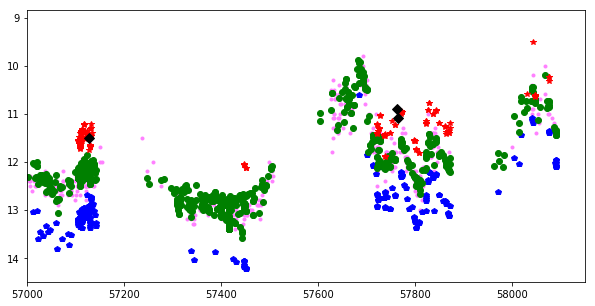

In [16]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
plotaavso(ax)
ax.set_xlim([57000, 58150])
ax.invert_yaxis()

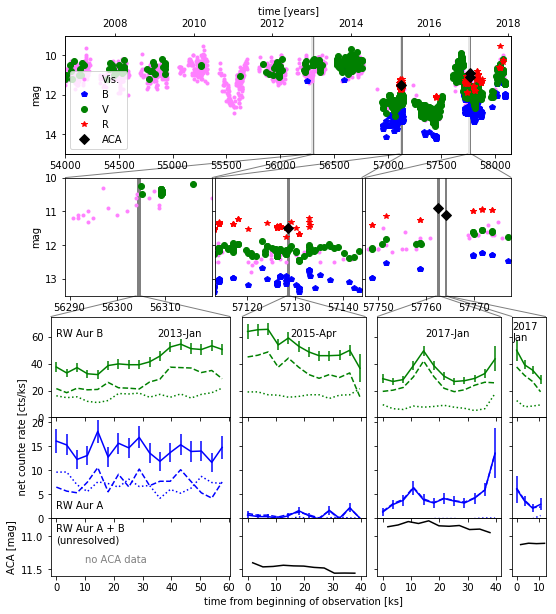

In [17]:
from matplotlib.ticker import MaxNLocator, MultipleLocator
    
from matplotlib.transforms import Bbox, TransformedBbox, \
    blended_transform_factory, Affine2D

from mpl_toolkits.axes_grid1.inset_locator import BboxPatch, BboxConnector,\
    BboxConnectorPatch

# code for zoom effects taken and modified from http://matplotlib.org/users/annotations_guide.html
def connect_bbox(bbox1, bbox2,
                 loc1a, loc2a, loc1b, loc2b,
                 prop_lines, prop_patches=None):
    if prop_patches is None:
        prop_patches = prop_lines.copy()
        prop_patches["alpha"] = prop_patches.get("alpha", 1)*0.2

    c1 = BboxConnector(bbox1, bbox2, loc1=loc1a, loc2=loc2a, **prop_lines)
    c1.set_clip_on(False)
    c2 = BboxConnector(bbox1, bbox2, loc1=loc1b, loc2=loc2b, **prop_lines)
    c2.set_clip_on(False)

    bbox_patch1 = BboxPatch(bbox1, **prop_patches)
    bbox_patch2 = BboxPatch(bbox2, **prop_patches)

    p = BboxConnectorPatch(bbox1, bbox2,
                           # loc1a=3, loc2a=2, loc1b=4, loc2b=1,
                           loc1a=loc1a, loc2a=loc2a, loc1b=loc1b, loc2b=loc2b,
                           **prop_patches)
    p.set_clip_on(False)

    return c1, c2, bbox_patch1, bbox_patch2, p


def zoom_effect(ax1, ax2, xtrans=Affine2D(), **kwargs):
    """
    ax1 : the main axes
    ax2 : the zoomed axes

    connect ax1 & ax2. The x-range of (xmin, xmax) in both axes will
    be marked.  The keywords parameters will be used ti create
    patches. The xmin & xmax will be taken from the
    ax1.viewLim.
    """

    tt = ax1.transScale + (ax1.transLimits + ax2.transAxes)
    trans = blended_transform_factory(xtrans + ax2.transData, tt)

    mybbox1 = ax1.bbox
    mybbox2 = TransformedBbox(ax1.viewLim, trans)

    prop_patches = kwargs.copy()
    prop_patches["ec"] = "none"
    prop_patches["alpha"] = 0.2

    # The inversion messes up the coner points.
    # This is tweaked for inverted axes.
    # I'm sure ther is some clever way to use the right transforms for the y axis 
    # to take care of that automatically, but for 
    # a one-off script it's much simpler to just adjust the corners by hand.
    if ax1.yaxis_inverted():
        loc2a = 2
        loc2b = 1
    else:
        loc2a = 3
        loc2b = 4
    
    c1, c2, bbox_patch1, bbox_patch2, p = \
        connect_bbox(mybbox1, mybbox2,
                     loc1a=2, loc2a=loc2a, loc1b=1, loc2b=loc2b,
                     prop_lines=kwargs, prop_patches=prop_patches)

    #ax1.add_patch(bbox_patch1)
    ax2.add_patch(bbox_patch2)
    ax2.add_patch(c1)
    ax2.add_patch(c2)
    ax2.add_patch(p)

    return c1, c2, bbox_patch1, bbox_patch2, p

fig = plt.figure(figsize=(8, 10))
ax11 = fig.add_subplot(411)
ax21 = fig.add_subplot(434)
ax22 = fig.add_subplot(435, sharey=ax21)
ax23 = fig.add_subplot(436, sharey=ax21)

# Set up second x-axis for top plot that is labeled in years
ax11years = ax11.twiny()

def years(tmjd):
    return Time(tmjd, format='mjd').decimalyear

def update_ax11years(ax11):
   y1, y2 = ax11.get_xlim()
   ax11years.set_xlim(years(y1), years(y2))
   ax11.figure.canvas.draw()

# automatically update ylim of ax2 when ylim of ax1 changes.
ax11.callbacks.connect("xlim_changed", update_ax11years)

for ax in fig.axes:
    plotaavso(ax)
    
for ax in fig.axes:
    for i in range(4):
        ax.bar(obstimes[i][0], height=10, width=obstimes[i][1]-obstimes[i][0], bottom=8, align='edge', 
               color='0.5', edgecolor='0.5')
    
ax11.invert_yaxis()
ax11.set_xlim([54000, 58150])
dtime = 15.
for i, ax in enumerate([ax21, ax22, ax23]):
    ax.set_xlim(obstimes[i][0] - dtime, obstimes[i][1] + dtime)
    ax.get_xaxis().get_major_formatter().set_useOffset(False)
    ax.xaxis.set_major_locator( MaxNLocator(nbins=4, steps=[1, 5, 10]) )
plt.setp(ax22.get_yticklabels(), visible=False)
plt.setp(ax23.get_yticklabels(), visible=False)



ax11.legend(numpoints=1, loc='lower left')
ax11.set_ylabel('mag')
ax21.set_ylabel('mag')
ax22.set_xlabel('time [MJD]')
ax11years.set_xlabel('time [years]')

ax21.set_ylim([13.5, 10])
ax11.set_ylim([15, 9])


width = np.array([lc[0]['t'][-1] for lc in lccurves])
width = width / width.sum() * 0.8  # last factor is scale factor to make space for label left of plot
ypos = [0.13, 0.21, 0.35]
dy = [0.08, 0.14, 0.14]
axes = []
for y in range(3):
    for x in range(4):
        kwargs = {}
        if y != 0:
            kwargs['sharex'] = axes[x]
        if x != 0:
            kwargs['sharey'] = axes[y * 4]
        axes.append(fig.add_axes((.1 + np.sum(width[0:x]) + x * 0.02, ypos[y], width[x], dy[y]), **kwargs))

for j in range(3):
    for i in [1, 2, 3]:
        plt.setp(axes[j * 4 + i].get_yticklabels(), visible=False)
        
for j in [1, 2]:
    for i in range(4):
        plt.setp(axes[j * 4 + i].get_xticklabels(), visible=False)
    
for i, obsid in enumerate(obsids):
    axes[1 * 4 + i].errorbar(lccurves[i][0]['t']/1e3, lccurves[i][0]['NET_RATE_all'] * 1e3, lccurves[i][0]['ERR_RATE_all'] * 1e3, 
                             label='0.3-9.0 keV', color='b')
    axes[1 * 4 + i].plot(lccurves[i][0]['t']/1e3, lccurves[i][0]['NET_RATE_soft'] * 1e3, 
                         color='b', ls=':', label='0.3-1.0 keV')
    axes[1 * 4 + i].plot(lccurves[i][0]['t']/1e3, lccurves[i][0]['NET_RATE_hard'] * 1e3, 
                         color='b', ls='--', label='1.0-9.0 keV')
    axes[2 * 4 + i].errorbar(lccurves[i][1]['t']/1e3, lccurves[i][1]['NET_RATE_all'] * 1e3, lccurves[i][1]['ERR_RATE_all'] * 1e3,
                             label='RW Aur B', color='g')
    axes[2 * 4 + i].plot(lccurves[i][1]['t']/1e3, lccurves[i][1]['NET_RATE_soft'] * 1e3, 
                         color='g', ls=':', label='_no_legend_')
    axes[2 * 4 + i].plot(lccurves[i][1]['t']/1e3, lccurves[i][1]['NET_RATE_hard'] * 1e3, 
                     color='g', ls='--', label='_no_legend_')
    #axes[2 * 4 + i].set_title(obsid)
    if i > 0:
        axes[i].plot(lcaca[i-1]['time'] / 1e3, lcaca[i - 1]['mag'], color='k')
    
axes[8].yaxis.set_major_locator( MaxNLocator(nbins=4) )

for i in [0, 1, 2, 3]:
    axes[i].xaxis.set_major_locator( MultipleLocator(10) )
    axes[i].set_xlim(-2, None)
axes[4].set_ylim(0, 0.021 * 1e3)
axes[8].set_ylim(0, 0.075 * 1e3)   
axes[0].invert_yaxis()
#axes[5].legend(fontsize=10, loc='upper left')
axes[4].set_ylabel('                    net counte rate [cts/ks]')
axes[1].set_xlabel('time from beginning of observation [ks]')
axes[0].set_ylabel('ACA [mag]')
axes[8].text(0., 60., 'RW Aur B')
axes[4].text(0, 2., 'RW Aur A')
axes[0].text(0, 11.1, 'RW Aur A + B\n(unresolved)')
axes[0].text(10, 11.4, 'no ACA data', color='0.5')
axes[8].text(35., 60, '2013-Jan')
axes[9].text(15, 60., '2015-Apr')
axes[10].text(15, 60., '2017-Jan')
axes[11].text(-2, 57., '2017\nJan')

zoom_effect(ax21, ax11, color='0.5')
zoom_effect(ax22, ax11, color='0.5')
zoom_effect(ax23, ax11, color='0.5')

zoom_effect(axes[8], ax21, xtrans=Affine2D.from_values(1./(24*3600/1000), 0, 0, 1, obstimes[0][0], 0), color='0.5')
zoom_effect(axes[9], ax22, xtrans=Affine2D.from_values(1./(24*3600/1000), 0, 0, 1, obstimes[1][0], 0), color='0.5')
zoom_effect(axes[10], ax23, xtrans=Affine2D.from_values(1./(24*3600/1000), 0, 0, 1, obstimes[2][0], 0), color='0.5')
zoom_effect(axes[11], ax23, xtrans=Affine2D.from_values(1./(24*3600/1000), 0, 0, 1, obstimes[3][0], 0), color='0.5')

fig.subplots_adjust(wspace=0.02)

fig.savefig(os.path.join(figout, 'lc.pdf'), bbox_inches='tight')

Figure~\ref{fig:lc} shows X-ray lightcurves for both components of the RW~Aur system and the ACA lightcurve where data exist. RW~Aur~B shows X-ray variability in every observation, but the average count rates are all similar. During the first observation, the flux increases smoothly by 30\% and decreases by a similar amount in the second observation. In 2017 there is a short flare in the hard band that lasts about 5~ks and a rise in the soft band just before the end of the exposure. The second observation in 2017 shows rapid decline of the hard X-ray flux, possibly the tail end of a flare. Note that the count rate in the soft band is lower for the later observations, because contamination builds up on \emph{Chandra}/ACIS detector and the effective area declines between epochs. 
% Also,  the raw count rate shown in the figure underpredicts the photon flux in 2017 by a few percent due to pile-up. 
RW~Aur~A is fainter than RW~Aur~B in all observations. Significant variability within an observation is seen only towards the end of the first observation in 2017 when the flux triples. The count rate in 2015 is more than an order of magnitude below the value seen in 2013 before the optical dimming started. In the 2017 observations, the count rate in the hard band reached about the pre-dimming level again, but essentially no signal is detected in the soft band.

The ACA monitoring shows steady lightcurves with smooth variability on the 0.1~mag level during the observations and a difference of about 0.2~mag between the two observations in 2017 which are about two days apart. This is consistent with variability typically seen when the accretion rate changes or accretion spots rotate in and out of view \citep{2016MNRAS.463.4459B}.

In [18]:
# Check if last bin in 17764 is responsible for an unsusually large fraction for 6.62 keV photons
srca = Table.read(os.path.join(datadir, '17764_srca.fits'), hdu=1)

(6000, 7000)

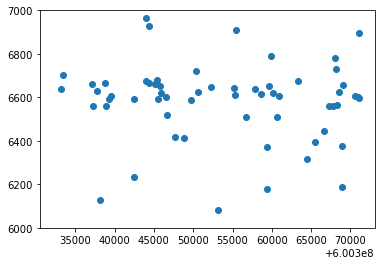

In [19]:
plt.scatter(srca['time'], srca['energy'])
plt.ylim(6000, 7000)

### Long-term lightcurves

Figure~\ref{fig:lc} (top rows) shows a long-term lightcurve of the RW~Aur~AB system. The first \emph{Chandra} observation (marked by the first gray vertical line) took place during a bright state which had been the long-term average for several decades with $m_V\approx 10.5$~mag. The second \emph{Chandra} dataset was taken in an obscured state with $m_V=12$~mag in 2015. At the end of 2016, RW~Aur~AB briefly reached a bright state again, before fading back to $m_V=11.7$ during the \emph{Chandra} observations in 2017. Unfortunately, there is a gap in the optical data of a few days right around the \emph{Chandra} observation. However, while RW~Aur~AB is known to have some variation on time scales of days and hours \citep{2016MNRAS.463.4459B}, the lightcurve around the 2017 observations seems relatively smooth and the ACA lightcurves do not indicate significant variability within an observation (Figure~\ref{fig:lc}), so we interpolate the optical lightcurves to obtain values during the \emph{Chandra} observation (table~\ref{tab:BVR}). In 2015, there are observations within a few hours of the \emph{Chandra} data in all bands. In all cases, the uncertainty is dominated by the variability of the target and we estimate the error on the optical magnitudes to 0.2~mag. Within this uncertainty, RW~Aur~AB is brighter by 0.5~mag in $B$, $V$, $R$, and the ACA band during the 2017 \emph{Chandra} observation, compared with 2015. We do not see significant changes in the optical color between those observations.

None of the optical data presented here resolves the two components of the RW~Aur~AB system. \citet{2015IBVS.6126....1A} show that RW~Aur~B is also variable, but to a much lesser degree than RW~Aur~A. Comparing observations from 1994 and 2014 they find that RW~Aur~B has become brighter by about 0.7~mag with almost no color variability. They suggest this to be due to a dust cloud with large grains moving through our line-of-sight, analogous to what is discussed for RW~Aur~A. We assume that this evolution is slow and subtract the long-term average of the RW~Aur~B fluxes (table~\ref{tab:BVR}) to obtain the flux of RW~Aur~A. Within the uncertainties, we do not see changes in color. On the other hand, changes in $B-V$ color up to about 0.3~mag ($1\sigma$ confidence range) are also possible.

In [20]:
# output->LaTeX

def mA(mAB, mB):
    return -2.5 * np.log10(10**(-mAB/2.5) - 10**(-mB/2.5))

def sigma_mA(mAB, mB, sig_AB, sig_B):
    nominator = sig_AB**2*10.**(-0.8*mAB) + sig_B**2 * 10.**(-0.8*mB)
    demoninator = 10.**(-mAB/2.5) - 10.**(-mB/2.5)
    return np.sqrt(nominator) / demoninator

tab = Table()
tab['band'] = ['B', 'V', 'R']
tab['$m_B$'] = np.array([14.5, 13.2, 12.3])
tab['$\sigma_B$'] = 0.3
tab['$m_{AB}$ 2015'] = np.array([13., 12.2,11.5])
tab['$m_{AB}$ 2017'] = np.array([12.5,11.7, 11.2])
tab['$\sigma_{AB}$'] = 0.2
tab['$m_{A}$ 2015'] = mA(tab['$m_{AB}$ 2015'], tab['$m_B$'])
tab['$\sigma_A$ 2015'] = sigma_mA(tab['$m_{AB}$ 2015'], tab['$m_B$'], tab['$\sigma_{AB}$'], tab['$\sigma_B$'])
tab['$m_{A}$ 2017'] = mA(tab['$m_{AB}$ 2017'], tab['$m_B$'])
tab['$\sigma_A$ 2017'] = sigma_mA(tab['$m_{AB}$ 2017'], tab['$m_B$'], tab['$\sigma_{AB}$'], tab['$\sigma_B$'])
for col in tab.columns:
    if col != 'band':
        tab[col].format = '{:3.1f}'
        
#latexdict = copy.deepcopy(latex.latexdicts['AA'])
#latexdict['tabletype'] = 'table*'
#latexdict['caption'] = '\\label{tab:BVR} Optical flux (in mag) for RW~Aur.'
# tab.write(sys.stdout, format='ascii.latex', latexdict=latexdict)

# Now re-format table to have value +- sigma in one column. Easier to read by eye and for a table with
# just three columns that's what most people do.

print(r'\begin{table*}')
print(r'\caption{\label{tab:BVR} Optical flux (in mag) for RW~Aur.}')
print(r'\begin{tabular}{cccccc}')
print(r'\hline \hline')
print(r'RW Aur & B (obs) & AB (obs) & AB (obs) & A (infered) & A (infered) \\')
print(r'year & 2014 & 2015 &  2017 & 2015 & 2017 \\')
for i, b in enumerate('BVR'):
    print(r'${}$ & ${:3.1f} \pm {:3.1f} $ & ${:3.1f} \pm {:3.1f} $ & ${:3.1f} \pm {:3.1f} $ & ${:3.1f} \pm {:3.1f} $ & ${:3.1f} \pm {:3.1f} $\\'.format(tab['band'][i],
                                                                                                   tab['$m_B$'][i],
tab['$\sigma_B$'][i], tab['$m_{AB}$ 2015'][i], tab['$\sigma_{AB}$'][i], tab['$m_{AB}$ 2017'][i], tab['$\sigma_{AB}$'][i],
tab['$m_{A}$ 2015'][i], tab['$\sigma_A$ 2015'][i], tab['$m_{A}$ 2017'][i], tab['$\sigma_A$ 2017'][i]))

print(r'\hline')
print(r'\end{tabular}')
print(r'\end{table*}')

\begin{table*}
\caption{\label{tab:BVR} Optical flux (in mag) for RW~Aur.}
\begin{tabular}{cccccc}
\hline \hline
RW Aur & B (obs) & AB (obs) & AB (obs) & A (infered) & A (infered) \\
year & 2014 & 2015 &  2017 & 2015 & 2017 \\
$B$ & $14.5 \pm 0.3 $ & $13.0 \pm 0.2 $ & $12.5 \pm 0.2 $ & $13.3 \pm 0.3 $ & $12.7 \pm 0.2 $\\
$V$ & $13.2 \pm 0.3 $ & $12.2 \pm 0.2 $ & $11.7 \pm 0.2 $ & $12.8 \pm 0.4 $ & $12.0 \pm 0.3 $\\
$R$ & $12.3 \pm 0.3 $ & $11.5 \pm 0.2 $ & $11.2 \pm 0.2 $ & $12.2 \pm 0.5 $ & $11.7 \pm 0.4 $\\
\hline
\end{tabular}
\end{table*}


In [21]:
# In the following fields, try an special analysis of XMM data. 
# Does the centroid of the photons change with energy?
# First, get data files from reduced XMM data
XMMfiltslist = glob(os.path.join(datadirXMM, '*', '*filts.fits'))
XMMfiltslist.sort()
XMMfiltslist

['/melkor/d1/guenther/downdata/XMM/RWAur/0401870301/RWAur_1319_0401870301_EMOS1_S001_filts.fits',
 '/melkor/d1/guenther/downdata/XMM/RWAur/0401870301/RWAur_1319_0401870301_EMOS2_S002_filts.fits',
 '/melkor/d1/guenther/downdata/XMM/RWAur/0401870301/RWAur_1319_0401870301_EPN_S003_filts.fits',
 '/melkor/d1/guenther/downdata/XMM/RWAur/0401870301/RWAur_noflare_1319_0401870301_EMOS1_S001_filts.fits',
 '/melkor/d1/guenther/downdata/XMM/RWAur/0401870301/RWAur_noflare_1319_0401870301_EMOS2_S002_filts.fits',
 '/melkor/d1/guenther/downdata/XMM/RWAur/0401870301/RWAur_noflare_1319_0401870301_EPN_S003_filts.fits']

In [22]:
pn = Table.read(XMMfiltslist[2])
pn.sort('PI')

In [23]:
# Get position of A and B in DS9 by hand. Much faster than parsing the header values for event list.
# Project everything on the A-B line. The direction perpendicular to that is not important for us.
vecAB = np.array([27145., 27557]) - np.array([27175., 27549])
vecAB = vecAB / np.linalg.norm(vecAB)
vecevpos = np.empty((len(pn), 2))
vecevpos[:, 0] = pn['X']
vecevpos[:, 1] = pn['Y']
pn['proj'] = np.sum(vecevpos * vecAB, axis=1)

In [24]:
# Make a running average of the x,y pos in chunks of +-w photons (effectively a moving boxcar on the energy sorted
# photon list).
w = 200
res = np.zeros(len(pn) - 2 * w)
sig = np.zeros_like(res)
for i in range(w, len(pn) - w):
    res[i - w] = np.median(pn['proj'][i - w: i + w])
    sig[i - w] = np.std(pn['proj'][i - w: i + w])
    
# Median is better than mean, because it's not influenced as much by the boundaries of the photons in the input fits file
# (a  circle centered on the peak of the count distribution).

/nfs/melkor/d1/guenther/soft/anaconda/envs/py35/lib/python3.5/site-packages/numpy/core/fromnumeric.py:639: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


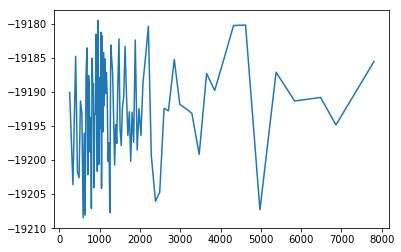

In [25]:
plt.plot(pn['PI'][w: -w: 2 * w], res[:: 2 * w])
#plt.errorbar(pn['PI'][w: -w: 2 * w], res[:: 2 * w], sig[:: 2 * w])

# I looked at different values for w, and PN and MOS and I don't see anything. Thus, this analysis stays here for
# reference, but does not get it's own section in the paper.

In [26]:
pn['TIME'][0]

288476254.54848468

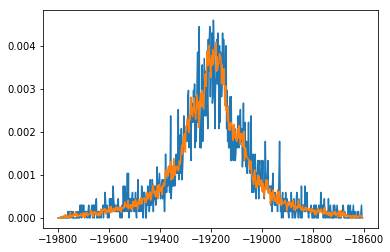

In [27]:
noflare = pn['TIME'] < 288466000
h1 = np.histogram(pn['proj'][noflare], bins=np.arange(-19800, -18600, 2), density=True)
h2 = np.histogram(pn['proj'][~noflare], bins=np.arange(-19800, -18600, 2), density=True)
plt.plot(h1[1][:-1], h1[0])
plt.plot(h2[1][:-1], h2[0])

In [28]:
# Writing as comment to prevent LaTeX export

# The plot above indicates not significant difference in the position of the falre and noflare centroid.
# A similar (but more thourough) analysis is running epdetec-chain in SAS.
# I did that and found that there is no indication of a shift in centroid during the flare and that the errors are 
# so small, that the flare essentially has to come from the source that dominats the continuum emission.

srcnoflare = Table.read(os.path.join(datadirXMM, '0401870301', 'emlnoflare.fits'))
srcflare =  Table.read(os.path.join(datadirXMM, '0401870301','emlflare.fits'))
src1noflare = SkyCoord(srcnoflare['RA'][0], srcnoflare['DEC'][0], unit='deg')
src1flare = SkyCoord(srcflare['RA'][0], srcflare['DEC'][0], unit='deg')
src1noflare.separation(src1flare).arcsec, srcnoflare['RADEC_ERR'][0], srcflare['RADEC_ERR'][0]

(0.10346953082180739, 0.41059273, 0.16118589)

### X-ray spectra

We first discuss the \emph{XMM-Newton} data from 2007 where RW~Aur~AB is unresolved, but we have the most signal. In all resolved observations (figure~\ref{fig:regions}) RW~Aur~B is much brighter than RW~Aur~A and thus it is likely that the \emph{XMM-Newton} data is dominated by RW~Aur~B, too. Indeed, in section~\ref{sect:chan:rwb} we find that our spectral model for the \emph{XMM-Newton} spectrum fits the resolved \emph{Chandra} data from RW~Aur~B, too. Thus, we can use it to describe the spectral shape of the binary contamination to the \emph{Chandra} data from RW~Aur~A (section~\ref{sect:allChandra}). In the 2017 observation of RW~Aur~A we find a strong emission feature at 6.62~keV and in section~\ref{sect:2017} we analyze this in detail.

For consistency with previous work, we use the abundance table from \citet{1998SSRv...85..161G} as baseline throughout this paper. Uncertainties in this section are given as 90\% confidence ranges.

#### 2007 \emph{XMM-Newton} data
\label{sect:xmmdata}

The first half of the observation shows steady emission whereas a large flare erupted during the second half of the observation with an increase in count rate by a factor of $\sim20$. At the same time, the spectrum hardens. We compared the centroid of the X-ray emission in the quiescent and the flare phase and they agree to about 0.1\arcsec{} (with statistical uncertainties of 0.4 and 0.2\arcsec{} respectively). Most likely, the flare thus occurs on the same component that dominated the quiescent X-ray emission.
The \emph{XMM-Newton} data from RW~Aur~B are displayed in figure~\ref{fig:RWAurB}. They require at least three optically thin, thermal emission APEC model components \citep{2012ApJ...756..128F} and a cold photoelectric absorber for a satisfactory fit. We fit abundances in three groups of elements. We combine Mg, Si, and Fe into one group, because they all have very similar first ionization potential (FIP) values (7.6-8.1 eV). The FIP of Ne is 21.6~eV. We fix the abundances of elements with medium FIP values (S, O, N, and C all have FIP between 10 and 15 eV) to 1 because the absolute abundances cannot be determined without grating spectroscopy; if we, for example, multiplied all abundances in the model by three and reduced the emission measure by the same factor, the model would predict an almost identical spectrum. We fit the signal from the PN, MOS1, and MOS2 cameras on \emph{XMM-Newton} simultaneously binning the data to 25 counts per bin.

The 2007 \emph{XMM-Newton} spectrum of RW~Aur AB has a sizable hot component which gives rise to a 6.7~keV Fe line and points to a solar Ne/Fe ratio
%IFIP (inverse first ionization potential) abundances where the abundance of elements with a high FIP such as Ne are enhanced and Fe is reduced compared to solar abundances
(table~\ref{tab:rwB}). We fit the spectra for different time intervals in the lightcurve and find no significant changes in abundances or $N_{\mathrm{H}}$, only in the emission measure of individual temperature components.

In [29]:
import json
def read_json_fit_results(filename):
    with open(os.path.join(figout, filename)) as f:
        fit = json.load(f)
    for n in fit.keys():
        if n not in ['redchi2', 'dof']:
            fit[n] = np.array(fit[n])
    for c in ['val', 'up', 'down']:
        for i in range(len(fit[c])):
            if fit[c][i] is None:
                fit[c][i] = np.nan

    normem = 4 * np.pi * u.pc.to(u.cm)**2 * 140**2 * 1e14 * 1e-52
    for i in range(len(fit['name'])):
        if 'norm' in fit['name'][i]:
            for n in ['val', 'up', 'down']:
                fit[n][i] = fit[n][i] * normem
    # And dublicate the data here in a different format to make the printing scripts easier.
    # Ideally, there should be some better interface between sherpa results and this, but it is beyond
    # the scope of the current project to develop that.
    for i in range(len(fit['name'])):
        fit[fit['name'][i]] = {'val': fit['val'][i], 'up': fit['up'][i], 'down': fit['down'][i]}
    return fit

In [30]:
# output->LaTeX
xmm = read_json_fit_results('fit_XMM.json')
c1 = read_json_fit_results('chanB1.json')
c2 = read_json_fit_results('chanB2.json')
c3 = read_json_fit_results('chanB3.json')

def format_norm(m, vemscale=0, format='3.1f'):
    out = '{0:3.1f}'.format(m['val'] / 10**vemscale)
    if np.isfinite(m['down']):
        out += ('_{{{:'+format+'}}}').format(m['down'] / 10**vemscale)
    elif np.isnan(m['down']):
        out += ('_{{{:'+format+'}}}').format(-m['val'] / 10**vemscale)
    if np.isfinite(m['up']):
        out += ('^{{+{:'+format+'}}}').format(m['up'] / 10**vemscale)
    elif np.isnan(m['up']):
        out += '^{{+\infty}}'
    return '$' + out + '$'

def format_norms(title, vemscale, norms, modelname):
    out = '{0} & $10^{{52}}$~cm$^{{-3}}$ '.format(title)
    for n in norms:
        out += ' & ' + format_norm(n[modelname], vemscale)
    return out
        
print(r'\begin{table*}')
print(r'\caption{\label{tab:rwB} Parameters of X-ray models for RW~Aur AB and RW~Aur~B. Uncertainties are 90\% confidence ranges.}')
print(r'\begin{tabular}{llrrrr}')
print(r'\hline \hline')
print(r' & & RW Aur AB & \multicolumn{3}{c}{RW Aur B}\\')
print(r'parameter & unit & \emph{XMM-Newton} 2007 & \emph{Chandra} 2013 & \emph{Chandra} 2015 & \emph{Chandra} 2017\\')
print(r'\hline')
print(r'$N_\mathrm{{H}}$ & $10^{{21}}$~cm$^{{-2}}$ & {0} & {1} & {2} & {3} \\'.format(format_norm(xmm['a1.nH'], -1),
format_norm(c1['a1.nH'], -1), format_norm(c2['a1.nH'], -1), format_norm(c3['a1.nH'], -1)))

print(r'k$T_1$ & keV & {0} & \multicolumn{{3}}{{c}}{{fixed at \emph{{XMM-Newton}} value}} \\'.format(format_norm(xmm['v1.kT'])))
print(format_norms('$EM_1$', 1, [xmm, c1, c2, c3], 'v1.norm') + r'\\')
print(r'k$T_2$ & keV & {0} & \multicolumn{{3}}{{c}}{{fixed at \emph{{XMM-Newton}} value}} \\'.format(format_norm(xmm['v2.kT'])))
print(format_norms('$EM_2$', 1, [xmm, c1, c2, c3], 'v2.norm') + r'\\')
print(r'k$T_3$ & keV & {0} &\multicolumn{{3}}{{c}}{{fixed at \emph{{XMM-Newton}} value}} \\'.format(format_norm(xmm['v3.kT'])))
print(format_norms('$EM_3$', 1, [xmm, c1, c2, c3], 'v3.norm') + r'\\')
print(r'abund: Fe & & {0} & \multicolumn{{3}}{{c}}{{fixed at \emph{{XMM-Newton}} value}} \\'.format(format_norm(xmm['v1.Fe'])))
print(r'abund: Ne & & {0} & \multicolumn{{3}}{{c}}{{fixed at \emph{{XMM-Newton}} value}} \\'.format(format_norm(xmm['v1.Ne'])))

print(r'\hline')
print(r'red. $\chi^2$ (dof) & & {:3.1f} ({}) & {:3.1f} ({}) & {:3.1f} ({}) & {:3.1f} ({}) \\'.format(xmm['redchi2'], xmm['dof'], 
                                                                                                 c1['redchi2'], c1['dof'], 
                                                                                                 c2['redchi2'], c2['dof'], 
                                                                                                 c3['redchi2'], c3['dof']))
lxfac = (4 * np.pi * (140.*(1 * u.pc).to(u.cm))**2).value
print(r'intrinsic $\log L_X$ & erg~s$^{{-1}}$~cm$^{{-2}}$ & {0:4.1f}  & {1:4.1f} & {2:4.1f} & {3:4.1f} \\'.format(np.log10(xmm['flux'] * lxfac), 
                                                                                                       np.log10(c1['flux'] * lxfac), 
                                                                                                       np.log10(c2['flux'] * lxfac), 
                                                                                                       np.log10(c3['flux'] * lxfac)))
print(r'\hline')
print(r'\end{tabular}')
print('\end{table*}')

\begin{table*}
\caption{\label{tab:rwB} Parameters of X-ray models for RW~Aur AB and RW~Aur~B. Uncertainties are 90\% confidence ranges.}
\begin{tabular}{llrrrr}
\hline \hline
 & & RW Aur AB & \multicolumn{3}{c}{RW Aur B}\\
parameter & unit & \emph{XMM-Newton} 2007 & \emph{Chandra} 2013 & \emph{Chandra} 2015 & \emph{Chandra} 2017\\
\hline
$N_\mathrm{H}$ & $10^{21}$~cm$^{-2}$ & $1.9_{-0.1}^{+0.1}$ & $1.0_{-0.4}^{+0.4}$ & $1.2_{-0.6}^{+0.8}$ & $1.7_{-0.9}^{+2.7}$ \\
k$T_1$ & keV & $0.6_{-0.1}^{+0.1}$ & \multicolumn{3}{c}{fixed at \emph{XMM-Newton} value} \\
$EM_1$ & $10^{52}$~cm$^{-3}$  & $0.5_{-0.1}^{+0.1}$ & $0.1_{-0.0}^{+0.0}$ & $0.2_{-0.1}^{+0.1}$ & $0.1_{-0.1}^{+0.6}$\\
k$T_2$ & keV & $1.3_{-0.1}^{+0.3}$ & \multicolumn{3}{c}{fixed at \emph{XMM-Newton} value} \\
$EM_2$ & $10^{52}$~cm$^{-3}$  & $1.4_{-0.3}^{+0.3}$ & $0.3_{-0.0}^{+0.1}$ & $0.5_{-0.1}^{+0.1}$ & $0.4_{-0.1}^{+0.2}$\\
k$T_3$ & keV & $7.0_{-0.6}^{+0.6}$ &\multicolumn{3}{c}{fixed at \emph{XMM-Newton} value} \\
$EM_3$ & $10^

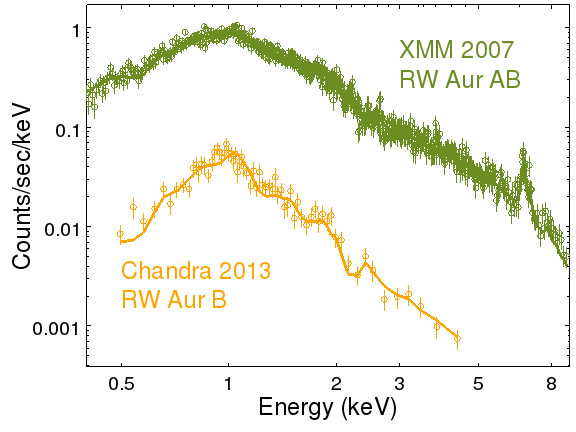

In [31]:
IPython.display.Image(filename=os.path.join(figout, 'specB.png'))

#### \emph{Chandra} spectra from RW Aur B
\label{sect:chan:rwb}
The \emph{Chandra} data from RW~Aur~B is qualitatively similar in all three observations, one example is shown in figure~\ref{fig:RWAurB}. Since the signal is considerably lower than in the \emph{XMM-Newton} observation, we cannot fit the same number of model parameters. Thus, we fix the temperatures and abundances for RW~Aur~B at the values obtained from the 2013 \emph{XMM-Newton} data in section~\ref{sect:xmmdata}, which is presumably dominated by signal from RW~Aur~B.

The overall flux differs between the \emph{Chandra} datasets, but the values for $N_\mathrm{H}$ overlap within their confidence intervals and the ratio of $EM_1 / EM_2$ is almost constant. The emission measure of the hot component $EM_3$ that gives rise to the 6.7~keV line in the \emph{XMM-Newton} data is absent in all observations. We conclude that the spectrum of RW~Aur~B in all \emph{Chandra} observations is so soft, that it does not contaminate the data of RW~Aur~A above 3 keV and that the contribution of RW~Aur~B to the RW~Aur~A spectrum at lower energies can be described by the same spectral model only changing normalizations.

#### Comparison of all \emph{Chandra} spectra from RW~Aur~A
\label{sect:allChandra}
\emph{Chandra} spectra from RW~Aur~A for the epochs 2013, 2015, and 2017 are shown in figure~\ref{fig:spec}.
In 2017, RW~Aur~A is significantly brighter at high energies and shows a strong emission feature located at 6.62~keV (inset in figure~\ref{fig:spec_17} and discussed in detail in section~\ref{sect:2017}) that is not seen in previous observations. At the same time, there is very little signal at soft energies after accounting for the contamination by the wings the PSF from RW~Aur~B. 
This decrease in soft ($\lesssim$ 2 keV) X-ray flux from RW Aur~A is the result of a
variable absorbing column density whose extinction is higher in 2017 than in the previously
observed bright state (2013; red in figure~\ref{fig:spec}) and it its previous faint state (2015; blue in figure~\ref{fig:spec}).

In [42]:
# output->LaTeX
f17 = read_json_fit_results('spec_fe.json')
fall = read_json_fit_results('spec_fit.json')
f2 = read_json_fit_results('spec_fit2.json')
f34 = read_json_fit_results('spec_fit34.json')
       
print(r'\begin{table*}')
print(r'\caption{\label{tab:rwA} Parameters of \emph{Chandra} X-ray models for RW~Aur A. Uncertainties are 90\% confidence ranges.}')
print(r'\begin{tabular}{llrrrr}')
print(r'\hline \hline')
print(r' & & \multicolumn{3}{c}{forcing same k$T_1$, k$T_2$, $EM_1/EM_2$} & independent\\ \cline{3-5}')
print(r'parameter & unit & 2013 & 2015 & 2017 & 2017\\')
print(r'\hline')
print(r'\multicolumn{2}{l}{energy range used in fit} & \multicolumn{3}{c}{0.3-9.0 keV} & 3-9 keV\\')
print(r'\multicolumn{2}{l}{contamination from RW Aur B} & \multicolumn{3}{c}{background model (see text)} & negligible\\')
print(r'$N_\mathrm{{h}}$ & $10^{{21}}$~cm$^{{-2}}$ & {1} & {2} & {3} & {0}\\'.format(
    format_norm(f17['a1.nH'], -1),
    format_norm(fall['a1.nH'], -1),
format_norm(fall['a2.nH'], -1), format_norm(fall['a3.nH'], -1)))
print(r'abund: Fe & & \multicolumn{{3}}{{c}}{{ = 0.4}} & {0} \\'.format(format_norm(f17['v1.Fe'])))
print(r'abund: Ne & & \multicolumn{3}{c}{ = 1.4}  & =1\\')
print(r'k$T_1$ & keV & \multicolumn{{3}}{{c}}{{= 0.63}}  & {0}\\'.format(format_norm(f17['v1.kT'])))
print(r'$EM_1$ & $10^{{52}}$~cm$^{{-3}}$ & {1} & {2} & {3}  & {0}\\'.format(
        format_norm(f17['v1.norm']),
        format_norm(fall['v11.norm']), 
        format_norm(fall['v21.norm']), 
        format_norm(fall['v31.norm'])))
print(r'k$T_2$ & keV & \multicolumn{3}{c}{= 20}  & --\\')
print(r'$EM_2$ & $10^{52}$~cm$^{-3}$  & \multicolumn{3}{c}{$1.3 \cdot EM_1 $} & --\\')
print(r'\hline')
print(r'red. $\chi^2$ & & \multicolumn{{3}}{{c}}{{ {0:3.1f} }} & Cash statistic \\'.format(fall['redchi2']))
print(r'\hline')
lxfac = (4 * np.pi * (140.*(1 * u.pc).to(u.cm))**2).value
print(r'intrinsic $\log L_X$ & erg~s$^{{-1}}$~cm$^{{-2}}$  & {1:4.1f} & {2:4.1f} & {3:4.1f}  & {0:4.1f}\\'.format(np.log10(f17['flux'] * lxfac), 
                                                                                                       np.log10(fall['flux'] * lxfac), 
                                                                                                       np.log10(f2['flux'] * lxfac), 
                                                                                                       np.log10(f34['flux'] * lxfac)))
print(r'\hline')
print(r'\end{tabular}')
print('\end{table*}')

\begin{table*}
\caption{\label{tab:rwA} Parameters of \emph{Chandra} X-ray models for RW~Aur A. Uncertainties are 90\% confidence ranges.}
\begin{tabular}{llrrrr}
\hline \hline
 & & \multicolumn{3}{c}{forcing same k$T_1$, k$T_2$, $EM_1/EM_2$} & independent\\ \cline{3-5}
parameter & unit & 2013 & 2015 & 2017 & 2017\\
\hline
\multicolumn{2}{l}{energy range used in fit} & \multicolumn{3}{c}{0.3-9.0 keV} & 3-9 keV\\
\multicolumn{2}{l}{contamination from RW Aur B} & \multicolumn{3}{c}{background model (see text)} & negligible\\
$N_\mathrm{h}$ & $10^{21}$~cm$^{-2}$ & $0.2_{-0.2}^{+0.4}$ & $28.6_{-21.5}^{+704.2}$ & $181.3_{-56.3}^{+86.6}$ & $382.0_{-93.1}^{+67.8}$\\
abund: Fe & & \multicolumn{3}{c}{ = 0.4} & $10.1_{-7.6}^{{+\infty}}$ \\
abund: Ne & & \multicolumn{3}{c}{ = 1.4}  & =1\\
k$T_1$ & keV & \multicolumn{3}{c}{= 0.63}  & $1.2_{-0.2}^{+0.9}$\\
$EM_1$ & $10^{52}$~cm$^{-3}$ & $0.7_{-0.1}^{+0.1}$ & $0.3_{-0.2}^{+4.3}$ & $5.3_{-1.9}^{+2.8}$  & $151.0_{-131.4}^{+140.4}$\\
k$T_2$ & keV & \mu

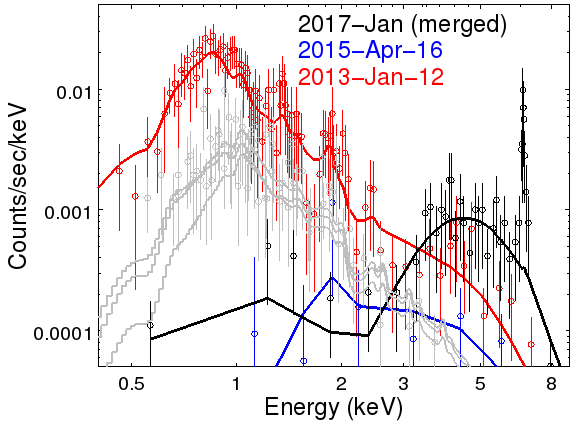

In [33]:
IPython.display.Image(filename=os.path.join(figout, 'spec.png'))

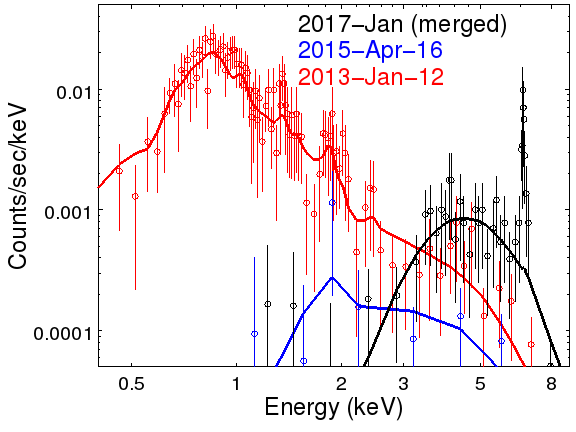

In [34]:
IPython.display.Image(filename=os.path.join(figout, 'spec_subtracted.png'))

Assumptions are needed to fit comparable models to these multi-epoch data because the 2015 observation yielded few photons and the 2013 and 2017 observations peak at very different energies. 
For each epoch of observations, we perform a simultaneous fit to data extracted from the RW~Aur~A source region (figure~\ref{fig:regions}) and the contribution by RW~Aur~B (this source confusion acts like a ``background'' for the RW~Aur~A spectrum). The spectral model for RW~Aur~B is fixed at the values found in table~\ref{tab:rwB} and scaled to account for the fact that only a small fraction of the RW~Aur~B photons falls into the RW~Aur~A source region.

We constrain the spectral model for RW~Aur~A as in \citet{2015A&A...584L...9S}, i.e.\ we use two optically thin, thermal emission APEC models where we fix temperatures and the ratio of the emission measure of the hot to the cool component (table~\ref{tab:rwA}). Abundances are again frozen at the values found in \citet{2015A&A...584L...9S} to facilitate comparison with previous work.
The RW~Aur~A model has two free parameters: Absorbing column density and emission measure for the cool component.
Fits are done using data grouped to five counts per bin using the \texttt{chi2gehrels} statistic in Sherpa \citep{2007ASPC..376..543D}. They do not reproduce the 2017 emission feature at 6.62~keV (figure~\ref{fig:spec}), but are very instructive to compare the absorbing column density $N_\mathrm{H}$ which has increased by about two orders of magnitude between 2013 and 2015 (albeit with large uncertainties) and another order of magnitude between 2015 and 2017 (table~\ref{tab:rwA}).

The photoelectric cross-section of all atoms and ions (in gas and small grains) in the line-of-sight contributes to the X-ray absorption. This is expressed as equivalent hydrogen column density $N_\mathrm{H}$, which is the total hydrogen column density of a gas with a solar abundance pattern. In the energy range between 2 and 3~keV where the observed flux drops (Figure~\ref{fig:spec}), O, Ne, and Fe are the metals that contribute most to the total photoelectric absorption cross-section \citep{1992ApJ...400..699B}. If these elements are enhanced by e.g.\ one order of magnitude compared to solar abundances, then the true hydrogen column density is one order of magnitude lower than the equivalent hydrogen column density $N_H$ obtained from the fit. The value for $N_\mathrm{H}$ is highly correlated with the temperature and the emission measure $EM = \int n_i n_e \mathrm{d}V$. A hotter and less absorbed plasma requires significantly less emission measure to produce the observed flux than a cooler and more absorbed plasma.


#### \emph{Chandra} spectra from RW~Aur~A in 2017
\label{sect:2017}
In this section, we present a fit to the 2017 \emph{Chandra} data using only the spectral region between 3 and 9~keV, where the contribution from RW~Aur~B due to source confusion is negligible. We relax the assumptions made in section~\ref{sect:allChandra} and construct a model that includes the 6.62~keV emission feature.

Both RW~Aur~A datasets observed in 2017 are fitted with the same model using ungrouped data and the Cash statistic \citep{1979ApJ...228..939C}. 

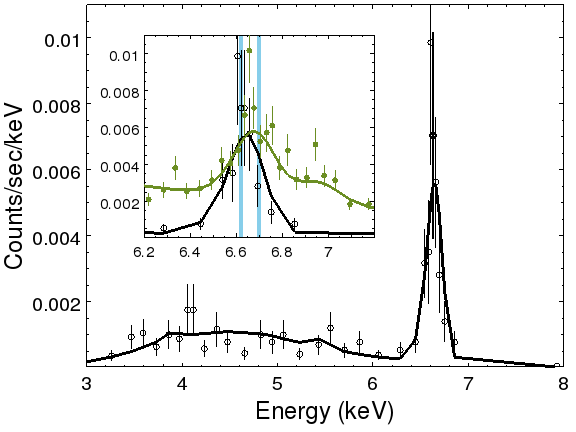

In [44]:
IPython.display.Image(filename=os.path.join(figout, 'spec_17.png'))

A single emission component where we vary emission measure, temperature, and Fe abundance and a cold photoelectric absorber (figure~\ref{fig:spec_17}) are sufficient to describe the data (table~\ref{tab:rwA}). A key feature is the emission peaking at $6.62\pm0.02$~keV ($1\sigma$ confidence interval), where the uncertainty of the peak position is determined from fitting a Gaussian plus a constant to the spectral region 6.0-7.5 keV and binning the data to five counts per bin. This region is dominated by a complex of unresolved iron emission lines in the ionization stages Fe~{\sc xxii} to Fe~{\sc xxv}. The He-like triplet of Fe~{\sc xxv} at 6.7~keV dominates the emission if enough hot plasma is present (peak formation temperature for the lines is $\mathrm{k}T=5.5$~keV, where k is the Boltzmann constant). The lower ionization stages have weaker lines, many of which are located at slightly lower energies. The peak of the emission feature seen in RW~Aur~A is around 6.62~keV, indicating that the temperature is too low to ionize iron up to Fe~{\sc xxv} (table~\ref{tab:rwA}). The emissivity of this iron feature drops by several orders of magnitude over a small range of temperatures. So, for temperatures at the lower end of the confidence interval, iron abundances several orders of magnitude above solar would be required to match the observed flux at 6.62~keV, while the best fit value is still one order of magnitude above solar. This plasma must emit strongly at lower energies, requiring a large absorbing column density of $N_\mathrm{H}\sim40\;\times10^{22}\;\mathrm{cm}^{-2}$ to match the observed data. This number is larger than the value determined in the previous section (table~\ref{tab:rwA}) due to a systematic ambiguity that is always present when fitting CCD data. If additional emission at soft energies is added and at the same time $N_\mathrm{H}$ is increased, the resulting spectrum remains almost unchanged. However, the fact that both the model in the previous section and here show an $N_H$ much larger than in previous observations indicates that this is a robust result.

## Discussion

The optical properties of RW~Aur~AB during the 2016/2017 dimming event are similar to the previous dimming observed from 2014-2016. The $B-V$ and $V-R$ color are similar, and the depth of the dimming is 0.5~mag less than before. In fact, from optical observations alone, it is not clear if the new dimming is an unrelated event or a continuation of the dimming that started in 2014 with a short gap in the absorbing material. 
On the other hand, in X-rays we observe a much larger $N_\mathrm{H}$ and Fe abundance in 2017 as well as more emission near 5 keV compared with previous epochs.

### Where does the absorbing column density come from?

\citet{2006A&A...452..897C} observed the disk of RW~Aur~A in $^{12}\mathrm{CO}$ and $^{13}\mathrm{CO}$ lines with radio interferometry. This allowed them to place limits on the surface density of warm gas in the disk of $5\times10^{21}\;\mathrm{cm}^{-2} < N_\mathrm{H} < 10^{23}\;\mathrm{cm}^{-2}$. Their upper limit on the disk surface density is close to our measured $N_\mathrm{H}$ and there might be an additional cold gas component in the disk mid-plane that is unseen in these observations. So, a sightline through the disk is compatible with our observed value for $N_\mathrm{H}$. The problem with this scenario is that the disk has an intermediate inclination. So, the sightline to the central star does not pass through the plane of the disk, unless the inner disk is massively warped. To make matters worse, any sightline though the disk should contain some small dust grains, in contrast to the observed gray absorption (see discussion on the $N_\mathrm{H}/A_V$ ratio in section~\ref{sect:nhav}).

In [55]:
n_H = np.zeros(3)
n_H_sig = np.zeros_like(n_H)

fit2017 = read_json_fit_results('spec_fe.json')
ind = fit2017['name'] == 'a1.nH'
n_H[2] = fit2017['val'][ind]
n_H_sig[2] = np.nanmean([fit2017['up'][ind][0], -fit2017['down'][ind][0]])

fitbefore = read_json_fit_results('spec_fit.json')
ind = fitbefore['name'] == 'a1.nH'
n_H[0] = fitbefore['val'][ind][0]
n_H_sig[0] = fitbefore['up'][ind][0]  # the other value is nan (interval goes down to 0)
                                   # Need to treat that in text, not in formula

ind = fitbefore['name'] == 'a2.nH'
n_H[1] = fitbefore['val'][ind]
n_H_sig[1] = np.nanmean([fitbefore['up'][ind][0], -fitbefore['down'][ind][0]])

n_H = n_H * 1e22
n_H_sig *= 1e22 / 1.654 # error are 90% conf. Turn this to 1 sigma

# Anders and Grevesse
Na_abund = 10**6.33 / 10**12
print (n_H, n_H_sig)
print (np.array([3e12,2e14]) / Na_abund)

[  2.45266272e+20   2.85714328e+22   3.82037787e+23] [  2.21937344e+20   2.19362813e+23   4.86136078e+22]
[  1.40320542e+18   9.35470283e+19]


Using the depth of several optical absorption lines, \citet{2016A&A...596A..38F} placed a limit on the gas phase column density of Na~{\sc i} of $3\times10^{12}\;\mathrm{cm}^{-2} < N_\mathrm{Na} < 2\times10^{14}\;\mathrm{cm}^{-2}$. Using solar photospheric abundances, we can compare that to the X-ray derived $N_\mathrm{H}$. The upper limit from \citet{2016A&A...596A..38F} is just compatible with the $N_\mathrm{H}$ from 2015 (but a factor of 25 below the $N_\mathrm{H}$ best-fit value) and three orders of magnitude below the X-ray $N_\mathrm{H}$ in 2017 indicating that almost all of the gas in the line-of-sight is ionized. Na in a low ionization state would be missed in the Na~{\sc i} measurement, but result in same X-ray measured $N_\mathrm{H}$ as neutral Na.


In [56]:
radius = 10. * u.AU 
dens = (2.5e23*u.cm**(-2) / radius).to(u.cm**(-3))
v_wind = 10 * u.km/u.s
Mdot_wind = (np.pi * radius**2 * dens * 1.4 * aconst.u * v_wind).to(u.M_sun / u.year)
dens, Mdot_wind

(<Quantity 1671146780.5671113 1 / cm3>,
 <Quantity 4.334870828138321e-06 solMass / yr>)

In [57]:
# Mass of clump
(np.pi * radius * dens * aconst.R_sun **2 * aconst.u).to(u.g)

<Quantity 6.31223237818317e+21 g>

In [58]:
# mass of mercury, the smallest planet
0.06 * aconst.M_earth

<Quantity 3.5834188382518635e+23 kg>

The model fit to the 2017 epoch indicates an extremely high absorbing column density of $>10^{23}$~cm$^{-2}$. During the 2014-2016 fading, \citet{2016A&A...596A..38F} and \citet{2016ApJ...820..139T} detected increased blue-shifted Ca~{\sc ii} absorption, indicative of an increasing mass outflow, and they also identify a much stronger [O~{\sc i}]~6300~\AA{} emission line, which is formed in the outflow, compared with spectra taken in the optically bright state. 
\citet{2016MNRAS.463.4459B} argue that this wind also carries the dust that causes the gray absorption. If this wind is strong within the dust evaporation radius, this could provide a large gas column density without any accompanying optical reddening.

As an order of magnitude estimate, we assume that we are looking through a uniform disk wind emanating from the inner 10~au of the disk, and that the line-of-sight does not pass through the disk itself. In order to reach the measured $N_\mathrm{{H}}$ value along the line-of-sight, the density in that region has to be $2 \times 10^9\;\mathrm{cm}^{-3}$.
Even for a modest outflow velocity of only 10~km~s$^{-1}$ this would result in a mass loss rate of more than $2\times10^{-6}\;M_\odot\;\mathrm{yr}^{-1}$. If true, a new knot will become visible in RW~Aur~A's jet very soon.
On the other hand, such mass loss cannot be sustained for very long and would be significantly larger than the mass accretion rate  $4\times10^{-8}\;M_\odot\;\mathrm{yr}^{-1}$ measured in the previous dimming. \citet{2016A&A...596A..38F} detected a reduced accretion rate in the photometrically dim state, but caution that part of the accretion region could be eclipsed. Thus, a more plausible scenario is that the absorbing column density is not outflowing. The new absorber in 2017 is at least large enough to cover the stellar disk. Assuming the same density $n$ and 10~au length $l$ as for the wind, we get a mass of 
\begin{equation}
m = \pi R_*^2 \; l \; n \; 1.4 u = 4 \times 10^{21} \mathrm{ g}
\end{equation}
where $u$ is the atomic mass unit and $1.4u$ the average particle mass. For comparison, this is more than the mass of the Martian moon Phobos \citep[$10^{19}$~g,][]{2014Icar..229...92P} but still five orders of magnitude below the mass of Mercury, the smallest inner planet in our Solar System ($4\times10^{26}$~g).
Similar estimates have been made to explain the added absorption in \object{TWA 30} and \object{T Cha} where \citet{2016MNRAS.459.2097P} and \citet{2009A&A...501.1013S} calculate $5\times10^{19}$~g and $4\times10^{20}$~g, respectively. These calculations only give an order of magnitude estimate for a lower limit to the total mass in this region, since the absorber might be much larger than just the size of the visible star. On the other hand, the true hydrogen column density could be lower than the fitted $N_\mathrm{H}$, if elements such as O, Ne, and Fe, which dominate the absorption between 2-3~keV, are enhanced compared to solar abundances. This reduces the required density and mass loss in a disk wind by the same factor.
Also, the variability within a dimming event in the optical lightcurve in figure~\ref{fig:opticallc} suggests that the absorber is not homogeneous.


### The $N_\mathrm{H}/A_V$ ratio
\label{sect:nhav}


In [59]:
av = np.array([0.44, 2.3, 1.5])
av_sig = np.array([0.1, 0.4, 0.3])
print ('N_H', n_H)
print('N_H_SIG', n_H_sig)
print (n_H / av / 1e21, np.sqrt(n_H_sig**2/av**2+av_sig**2*n_H**2/av**2) / 1e21)
years = [2013, 2015, 2017]

N_H [  2.45266272e+20   2.85714328e+22   3.82037787e+23]
N_H_SIG [  2.21937344e+20   2.19362813e+23   4.86136078e+22]
[   0.55742334   12.4223621   254.69185775] [  0.50747379  95.50448693  82.99676353]


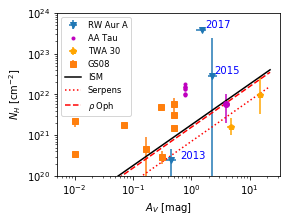

In [60]:
fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
ax.errorbar(av, n_H, xerr=av_sig, yerr=n_H_sig, fmt='v', label='RW Aur A')
for i in range(3):
    ax.text(av[i] + 0.2, n_H[i] * 1.1, '{0}'.format(years[i]), color='b')
ax.set_yscale("log", nonposy='clip')
ax.set_xscale("log", nonposy='clip')


gs08 = Table.read(figout + '../TW_Hya_uv_lineform/plots/nh_av.dat', 
                  format='ascii.no_header', delimiter=',', 
                  comment=';', names=['nh','nh_err_d','nh_err_u','AV','name'])
gs08.remove_row(-1)
ax.errorbar(gs08['AV'], gs08['nh'] * 1e21, 
            yerr=[-gs08['nh_err_d'] * 1e21, gs08['nh_err_u'] * 1e21], fmt='s', label='GS08')
# AA Tau - Grosso et al 2007
ax.plot([0.78] * 9, np.array([0.95, 1.54, 1.80, 1.36, 1.33, 1.04, 1.54, 1.02, 1.53]) * 1e22, 
'.m', label='AA Tau')
ax.errorbar(np.array([4]), np.array([0.6e22]), yerr=np.array([0.4e22]),
            xerr=np.array([[0.5, 1]]), color='m', fmt='o', label='_AA Tau extra abs')
# TWA 30 - Principe et al 2016
ax.errorbar([14.9, 4.7], [9.5e21, 1.6e21], 
            yerr=np.array([[0.61e22, 1.75e22],[0.06e22, 0.1e22]]).T, 
            xerr=np.array([[1.3, 0.6],[0.6, 0.6]]),
            color='orange', fmt='p', label='TWA 30')
x = np.arange(*ax.get_xlim(),step = .01)
ax.plot(x, x * 1.8e21, 'k', label='ISM')
#ax.plot(x, x*0.89 * 0.112 * 1e22, 'k--', label='NGC1333')
ax.plot(x, x*0.63 * 1e22 *0.112, 'r:', label='Serpens')
ax.plot(x, x*1.4 * 0.112 * 1e22, 'r--', label=r'$\rho$ Oph')
ax.set_xlabel('$A_V$ [mag]')
ax.set_ylabel('$N_H$ [cm$^{-2}$]')
ax.set_ylim([1e20, 1e24])
ax.set_xlim([.005, None])  # cuts of some low A_V sources fomr GS08
# Manually reorder the legend
legend_order=[4, 0, 6, 5, 1, 2, 3]
handles,labels = ax.get_legend_handles_labels()

handles = [handles[i] for i in legend_order]
labels = [labels[i] for i in legend_order]
ax.legend(handles, labels, loc='upper left', numpoints=1, ncol=1, fontsize='small')
fig.savefig(os.path.join(figout, 'nhav.pdf'), bbox_inches='tight')

Figure~\ref{fig:nhav} shows how the $N_\mathrm{H}/A_V$ ratio for RW~Aur~A changes with time.
As outlined in section~\ref{sect:introduction}, the additional absorber in the dim phases of RW~Aur~A seems to be gray in the optical photometry; in other words, it is not wavelength selective, because it blocks the light completely. This can either be caused by a screen of large particles such as large dust grains or planetesimals. In the X-rays we do not know the true intrinsic source flux. Above 4~keV, the flux is a few times larger in 2017 that it was before. Thus, we cannot reference the previous observations to estimate the true flux, as we do in the optical. It is possible that the gray absorber reduces the overall flux of X-rays in addition to the gas column density $N_\mathrm{H}$ changing the spectral shape.

Figure~\ref{fig:nhav} also shows two other CTTS where $N_\mathrm{H}$ and $A_V$ variability has been seen. AA~Tau used to show variability of $N_\mathrm{H}$ within its 8-day cycle, while the change in $A_V$ over the cycles was not significant \citep{2007A&A...475..607G}. The figure shows these data points as small dots without error bars. Data for AA~Tau's 2013 dimming event is taken from \citet{2015A&A...584A..51S}. 
\citet{2003A&A...408..581V} compared $N_H$ and $A_V$ for six nearby star
forming regions, including the ONC. For the $\rho$~Oph star forming region they
find an $N_H/A_V$ significantly below the ISM value - the same trend that RW~Aur~A exhibits in its bright state.
They interpret this as a sign that the cloud material has a lower metal abundance than
the ISM, consistent with recent solar abundance measurements.
Alternatively, grain growth can increase the amount of extinction per unit mass
until the grains reach 1 $\mu$m in size \citep{2011A&A...532A..43O}. Grain growths is also the scenario preferred by \citet{2007ApJ...669..493W} to explain the $N_\mathrm{H}/A_V$ ratio seen in the Serpens cloud, where $N_\mathrm{H}/A_V$ is less than half of the ISM value of  $1.8-2.2\times10^{21}\;\mathrm{cm}^{-2}\;\mathrm{mag}^{-1}$ \citep{1995A&A...293..889P}.

In [61]:
10**(1.5/2.5)

3.9810717055349722

\citet{2008A&A...481..735G} analyzed older,
but still accreting classical T Tauri stars (CTTS) in low-mass star forming regions. $N_\mathrm{H}$ and $A_V$ for this sample are measured non-simultaneously. 
They found consistently
high $N_\mathrm{H}/A_V$ ratios, indicating gas-rich material or massive grain growth - some
of these sources could be seen through the accretion column, which would be
dust-depleted due to the stellar irradiation. This argument places the additional absorber very close to the central star, where small grains evaporate. This is also consistent with the observations of AA~Tau where the 8-day periodicity proves that the absorber with high $N_\mathrm{H}/A_V$ ratio is located close to the star, whereas the new absorber, which has a more ISM-like  $N_\mathrm{H}/A_V$ ratio appeared on a much longer time scale and thus must be located at a larger distance from the star outside of the dust-sublimation radius.
RW~Aur~A has a fairly large accretion rate so there must be enough mass in the inner disk region, and possibly even within the dust-sublimation radius, to provide a large gas column density. However, there are no indications that the accretion rate changes significantly between the dim state and the bright state \citep{2016A&A...596A..38F}. Thus, the increased $N_\mathrm{H}$ points to a change in the geometry rather than a change in the accretion rate.

TWA~30 also has a time variable $N_\mathrm{H}/A_V$ ratio \citep{2016MNRAS.459.2097P} but is different from RW~Aur~A and AA~Tau as is presents a lower $N_\mathrm{H}/A_V$ ratio than the ISM similar to the Serpens cloud. Moreover, for TWA~30 the values of $N_\mathrm{H}$ and $A_V$ change with time, but the $N_\mathrm{H}/A_V$ could be the same. The two epochs of contemporaneous optical/X-ray observations are separated by more than a month, so the additional absorber can be located well outside of the dust sublimation radius. We see TWA~30 close to edge-on, so the measurements probe the composition of the disk where we expect evolved grains unlike RW~Aur.

### The extra emission measure

The \emph{Chandra} X-ray and optical lightcurves of RW~Aur~A (figure~\ref{fig:lc}) are mostly flat and the fact that a similar flux level was observed two days later shows that the observations were not taken during a big flare. Thus, the increased emission at energies above 3~keV in 2017 compared to 2013 and 2015 (figure~\ref{fig:spec}) must be due to a different structure of the emission region.

The energy of emission from shock heated material is limited by the velocity jump across the shock front. For the mass and radius of RW~Aur~A \citep{2001ApJ...556..265W,2012AstL...38..167D}, the free fall velocity is $<500\;\mathrm{km s}^{-1}$, and thus the temperature of the shock $<0.3$~keV. The relatively soft X-rays observed by \citet{2014ApJ...788..101S} in the resolved jet show that shocks in the outflow reach similar temperatures. Since the temperature of the observed plasma in 2017 is considerable larger, it must be magnetically heated in the corona.

### Fluorescent iron?

When iron is ionized by high-energy photons, an inner electron from the K-shell can be removed. Fluorescence occurs when an electron from a higher level (usually L) recombines to fill the K-shell. The energy of the fluorescent emission depends on the charge state of the ion. For neutral iron or Fe ions in a low ionization stage the energy is around 6.4~keV. Only for highly ionized Fe does this line reach an energy similar to the feature we observe in the 2017 observation of RW~Aur~A \citep[Fe~{\sc xxiii}: 6.63~keV,][]{2004ApJS..155..675K}. Fluorescent Fe emission is sometimes seen in CTTS when very bright flares occur and provide a high X-ray flux that ionizes neutral iron in the accretion disk or funnels \citep[e.g.][]{2005ApJS..160..503T,2007A&A...470L..13C,2010ApJ...714L..16H}. In contrast, in RW~Aur~A, we see a feature centered on 6.62~keV. If this is the fluorescence line, the source of it is so highly ionized that it must be located in the stellar corona, while at the same time, the source of the ionizing radiation must be hidden from view, since we do not detect an 6.7~keV feature. Thermal emission from a range of Fe species (mostly Fe~{\sc xxii}-Fe~{\sc xxiv}) as discussed in Section~\ref{sect:2017} is a simpler and more likely explanation for the observed spectrum.

### The Fe abundance



In [62]:
abund = 10
dens = 1e6 * u.cm**(-3)
V = 150e52*u.cm**(-3) / dens/ (1.4 * dens)
(V * dens * 10**7.5/10**12 * abund * 55.8 * u.u).to(u.M_earth)

<Quantity 5.256542628641657e-06 earthMass>

In [63]:
(u.M_sun * 0.03 * 10**7.5/10**12).to(u.M_earth)

<Quantity 0.31586038366125807 earthMass>

The best model fit to the X-ray spectrum of RW Aur A in section~\ref{sect:2017} shows an Fe abundance compared to solar of 10~(90\% confidence lower limit: 2.4, upper limit $>1000$) and an emission measure of $150\times10^{52}$~cm$^{-3}$.
An increase in iron abundance is not compatible with the properties of an active stellar corona. There is some element differentiation in coronae, where elements of low FIP such as Fe are enhanced in stars with low activity and depleted in stars with a high activity level \citep[see review by][and references therein]{2004A&ARv..12...71G}. RW~Aur~A had a low Fe abundance in 2013, which is compatible with this picture. However, in 2017 there is significantly more emission at high temperature, indicating a higher level of activity and thus the Fe abundance should have decreased instead of increased.
We use the $EM$ and abundance to estimate the total mass of iron in the emitting material, which is inversely proportional to the assumed density. For $n=10^6\;\mathrm{cm}^{-3}$, only about $10^{-5}$ Earth masses of iron are required in the emitting plasma. Since the plasma temperature rules out an origin in the accretion shock, any accreted mass must be transferred to the corona in some way. Observations of RS~CVn EI~Eri suggest that the time scale of element fractionation in active regions is a few days \citep{2013A&A...550A..22N}; similarly, the time scale on which mass lost to the solar wind is replaced is one to two days \citep{2015LRSP...12....2L}. Assuming that this time scale is also a reasonable estimate for the time that accreted iron remains in the corona before it is mixed in the convective zone or ejected into the stellar wind and assuming that the abundance we observe is typical for the most recent dimming starting in 2016, about $10^{-3}$ earth masses of iron have passed through the corona. A large planetesimal could easily supply this reservoir. On the other hand, this would not show up in photospheric abundances because at an age $<10$~Myr \citep{2001ApJ...556..265W} the convection zone of RW~Aur~A is still so deep that is contains about half of the total stellar mass \citep{2011ApJ...743...24S}. Any iron rich material accreted will be mixed in one convective turn-over time \citep[of order one year for RW~Aur,][]{2010A&A...510A..46L}.

## Scenarios

We are looking for a unified model that explains the variable absorption, Fe abundance, and increased volume of magnetically heated plasma.
The most obvious explanation for additional flux at high energies in an active star is a large coronal flare \citep[e.g.][]{2005ApJS..160..469F}. However, the X-ray and optical light curves during the observations in 2017 are almost flat. Also, coronal flares induce little change in $N_\mathrm{H}$, in contrast to our observations.
In the following sub-sections we discuss other scenarios. The last one, planetesimal break-up, seems to be most consistent with the data.

### Can this be explained by the tidal stream?

\citet{2013AJ....146..112R} suggested that the first dimming event in 2011 could be due to the tidal stream between RW~Aur~A and B passing through the line-of-sight. However, many of the features observed in the more recent dimming events can only be explained by variable phenomena near the location of the inner disk and/or the disk wind close to the star \citep[e.g.][]{2015IBVS.6143....1S,2015A&A...577A..73P,2016ApJ...820..139T,2016A&A...596A..38F,2016MNRAS.463.4459B} which is consistent with the data presented here: A stream of gas and dust passing by at a large distance from the star cannot cause the changes in the emission region needed to explain the increased hot emission and the Fe abundance inferred from X-ray spectral modeling (section~\ref{sect:2017}). Strictly speaking, this does not rule out that the 2011 event was caused by the tidal stream passing through our line-of-sight and any later dimming is due to an unrelated mechanism, but given the long-term stability of the lightcurve before 2011 \citep{2013AJ....146..112R} that seems unlikely.

### Planetesimal break-up in the inner disk

Circumstellar disks are the sites of planet formation. As part of this process, dust grains coagluate into larger aggregates and eventually into planetesimals and planets. When two particles collide, they may either stick together or break apart. Typical disk livetimes are a only few Myrs \citep[see review by][]{2014prpl.conf..475A}, but RW~Aur~A still has a disk at an apparent age of 10~Myr \citep{2001A&A...376..982W}, so the system certainly had enough time to from planets, possibly more than usual.

A possible scenario is that two large planetesimals collided in 2011 and released a cloud of smaller particles, which caused the optical dimming. After about 6 months, the particles are no longer visible because they are accreted onto the star or setteled into the disk midplane.

However, some larger fragments of the collision may remain and the collision may have set them on eccentric orbits increasing the probability of further collisions after the initial event. We see such a collision in 2014 and possibly again at the end of 2016. The products of each collision depend on the composition of the colliding planetesimals and the impact parameter \citep{2012A&A...540A..73W}. Collision products can collide again and cause a cascade that break up particles down to about 0.1~mm. Below this size, further collisions will cause grain growth \citep{2012A&A...544L..16W}. Particles that are more than $\mu$m sized will cause gray absorption in the optical with no change in the spectral shape. 

We can estimate the dust mass in the line of sight assuming spherical dust grains with radius $r$ and mass density $\rho=1\mathrm{g~cm}^{-3}$ distributed over a length $l$ with a number density $n$. The optical light curve shows a dimming of $\Delta V=2-3$~mag, so $\Delta V = e^{-\pi r^2 n l}$. As a minimum, the dust column covers the stellar disk, so a lower limit to the dust mass $M_d$ of the gray absorber is
\begin{equation}
M_d = \pi R^2_* \frac{\ln{4}}{\pi r^2}\frac{4}{3}\pi r^3 \rho \approx 3\times10^{19}
\;\mathrm{g}\; \left(\frac{r}{10\;\mu\mathrm{m}} \right)
\end{equation}

For grains with $r=0.1\;$mm, the dust mass is 1/10 of the gas mass estimated from $N_\mathrm{H}$ in section~\ref{sect:nhav}. 

In [64]:
(np.pi * u.R_sun**2 * np.log(4) * 4 / 3 * 10 * u.micrometer * (1. * u.g / u.cm**3)).to(u.g)

<Quantity 2.8105290121385255e+19 g>

The X-ray spectrum taken in 2015 did not show any peculiar Fe feature and emission in general was fainter than in 2017. Either accretion of Fe is intermittent, or the collision that caused the 2017 dimming event happened to include a more Fe rich planetesimal than the previous events. RW~Aur~A is old enough that considerable planet migration may have happened \citep[e.g.][]{2002ApJ...565.1257T} and thus the inner disk region may contain planets or planetesimals that formed in different regions of the disk and thus have different compositions.

While accretion of a terrestrial planet has never been observed directly in young stars, there are several white dwarfs whose surface abundances show signatures of ongoing accretion of debris from a terrestrial planet \citep{2011ApJ...732...90M,2012MNRAS.424..333G}. In a few Herbig Ae/Be stars (the more massive brethren of CTTS), \citet{2015A&A...582L..10K} observe photospheric abundances where refractory elements such as Fe are depleted. They conclude that grains must be accumulating in some planetary body, while the gas passes through the disk and is accreted onto the star. If a collision destroys such a planet, refractory elements may appear in the corona temporarily as we observe it in RW~Aur~A.

## Summary
We present new \emph{Chandra} data of the binary RW~Aur. The resolved binary member RW~Aur~A had several optical dimming events between 2011 and 2017. Previously published \emph{Chandra} data shows RW~Aur~A in an optically bright state and in a previous dimming event. We find that RW~Aur~A has an exceptionally high absorbing column density of a few $10^{23}\;\mathrm{cm}^{-2}$ in 2017, more than in the previous optical dimming event and orders of magnitude more than in the optically bright state. We also see significantly enhanced emission in the hard X-ray range above 3~keV and an Fe emission feature at 6.62~keV that indicates an Fe abundance one order of magnitude above solar. The temperature of the plasma is too high to be shock-heated; the most plausible location for it is an active corona. Significant accretion of Fe rich material is required to boost the abundance to the observed value. We speculate that the break-up of a terrestrial planet or a large planetesimal might supply the gray extinction seen in the optical, the large amount of gas column density observed as $N_\mathrm{H}$ in X-rays and also provide the iron in the accretion stream to enhance coronal abundances.



\acknowledgments
The scientific results reported in this article are based on observations made by the Chandra X-ray Observatory. We acknowledge with thanks the variable star observations from the AAVSO International Database contributed by observers worldwide and in particular the BAAVSS. This research has made use of software provided by the Chandra X-ray Center (CXC) in the application packages CIAO, ChIPS, and Sherpa. Support for this work was provided by the National Aeronautics and Space Administration through Chandra Award Numbers DD5-16077X and GO6-17021X issued by the Chandra X-ray Observatory Center, which is operated by the Smithsonian Astrophysical Observatory for and on behalf of the National Aeronautics Space Administration under contract NAS8-03060.

\vspace{5mm}
\facilities{CXO(ACIS,ACA), AAVSO}

%% Similar to \facility{}, there is the optional \software command to allow 
%% authors a place to specify which programs were used during the creation of 
%% the manuscript. Authors should list each code and include either a
%% citation or url to the code inside ()s when available.

\software{astropy \citep{2013A&A...558A..33A},
          CIAO \citep{2006SPIE.6270E..60F},
          Sherpa \citep{2007ASPC..376..543D}
          }

\bibliographystyle{../AAStex/v611/aasjournal}
\bibliography{../articles}

\end{document}

(20, 35)

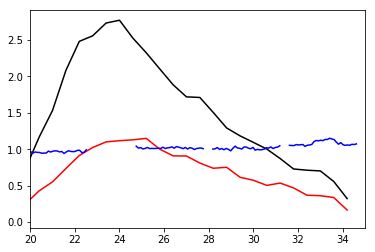

In [65]:
pns = Table.read(os.path.join(datadirXMM, '0401870301', 'RWAur_1319_0401870301_EPN_S003_soft_lc.fits'), hdu=1)
pnh = Table.read(os.path.join(datadirXMM, '0401870301', 'RWAur_1319_0401870301_EPN_S003_hard_lc.fits'), hdu=1)
omlist = glob(os.path.join(datadirXMM, '0401870301', '*OM*TIMESR1000.FIT'))
t0 = pns['TIME'][0]
plt.plot((pns['TIME'] - t0) / 1e3, pns['RATE'], label="0.2-1.0 keV", color='r')
plt.plot((pnh['TIME'] - t0) / 1e3, pnh['RATE'], label="1.0-8.0 keV", color='k')
for i, f in enumerate(omlist):
    if i==0:
        label = '290 nm'
    else:
        label = '_no_legend_'
    tom = Table.read(f)
    plt.plot((tom['TIME'] - t0) / 1e3, tom['RATE'] / 250, color='b', label=label)
plt.xlim(20, 35)

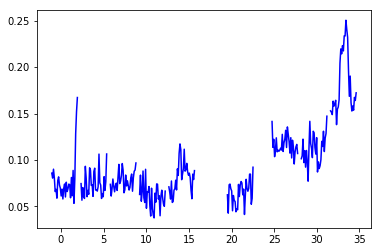

In [66]:
for i, f in enumerate(omlist):
    if i==0:
        label = '290 nm'
    else:
        label = '_no_legend_'
    tom = Table.read(f)
    plt.plot((tom['TIME'] - t0) / 1e3, tom['RATE'] / 250 -0.9, color='b', label=label)